**Turtle bycatch reported by Crew-based observer Program from tuna gillnet fisheries 2012 to 2018**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
# Load the Excel file from the specified path
file_path = r'C:\Users\Shoaib\Desktop\CBOP\CBOB_2012_17_v9.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet2')

objective: 
- Plot the trend changes of the turtle bycatch by observer, fishing method separately for the TTN and TTW over the period of time. The fishing method which included more and less bycatch. 

Varaible used in these analysis includes:
- Date 
- Turtle Total Number (TTN)
- Turtle total weight (kg) (TTW)
- observer (fisherman/ skipper)
- Fishing method - gear used

Summary Statistics:
               TTN         TTW
count   525.000000  516.000000
mean      1.196190   15.124322
std       0.522020   13.566488
min       1.000000    0.000000
25%       1.000000    6.000000
50%       1.000000   14.000000
75%       1.000000   20.000000
max       6.000000  100.000000
median    1.000000   14.000000
mode      1.000000    0.000000
var       0.272505  184.049606
skew      3.676339    1.817043
kurt     19.416950    5.854748
Q1        1.000000    6.000000
Q3        1.000000   20.000000
IQR       0.000000   14.000000
Outliers in TTN:
        S#    Observer       Date        Lat       Long Fishing_Method YTN  \
58      59       Iqrar 2013-03-17  23.261111  65.600000           SUGN  20   
89      90       Iqrar 2013-04-20  25.011111  65.069444           SUGN   6   
180    181       Iqrar 2013-10-16  23.951667  67.343333           SUGN   -   
594    595       Iqrar 2015-05-06  25.217778  66.654444           SUBS   -   
1167  1168      Ismail 2013-02-10  22.669444  

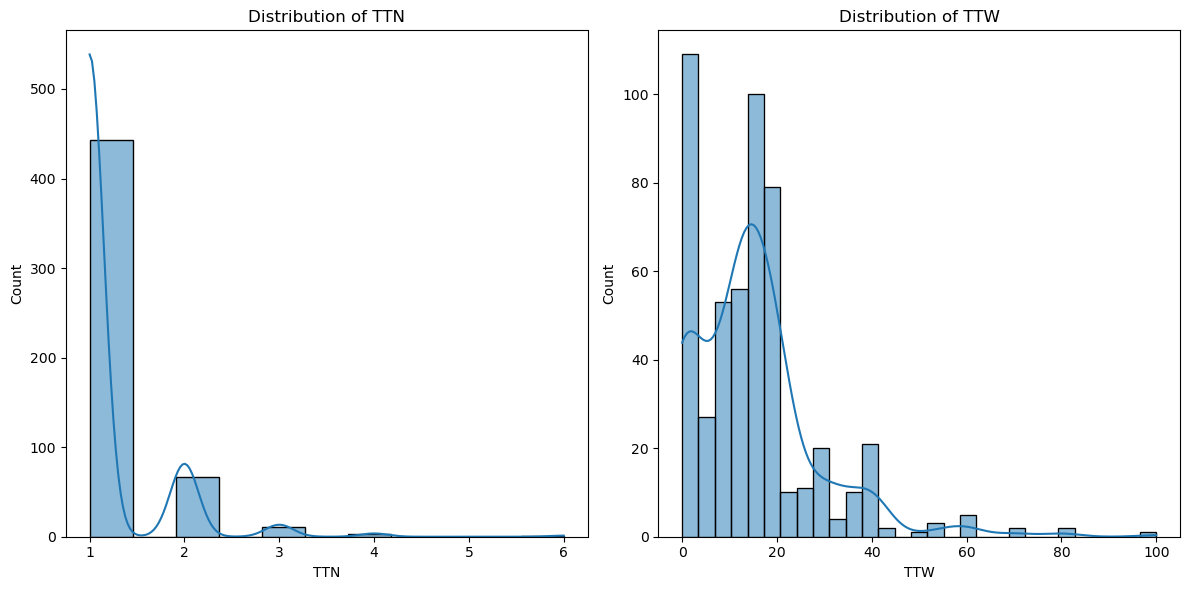

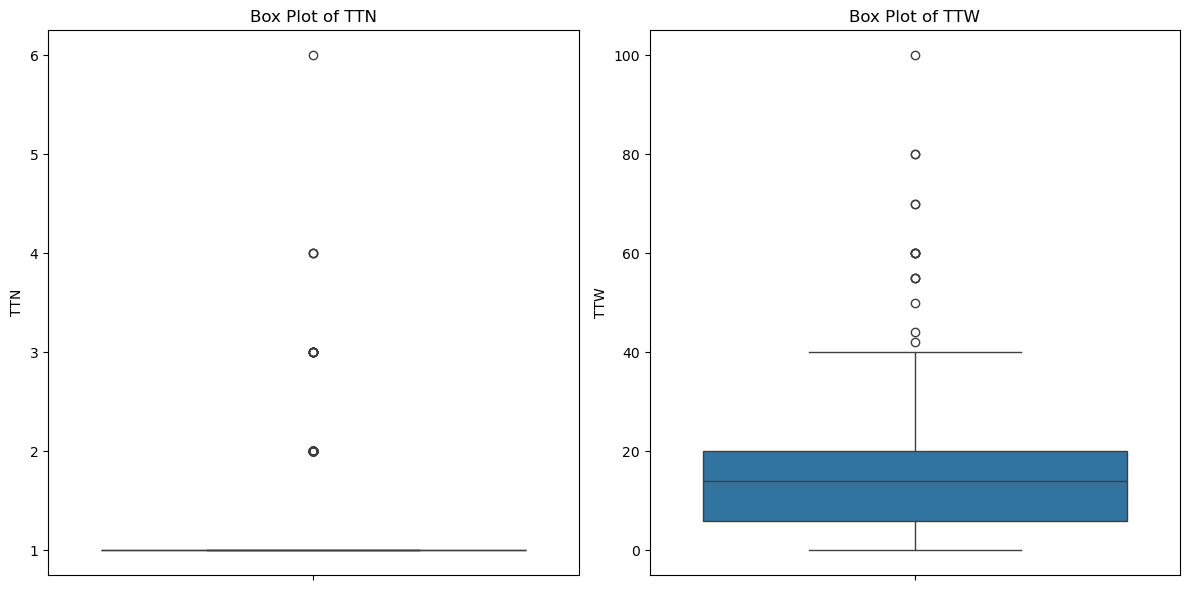

Correlation between TTN and TTW:
          TTN       TTW
TTN  1.000000  0.238187
TTW  0.238187  1.000000


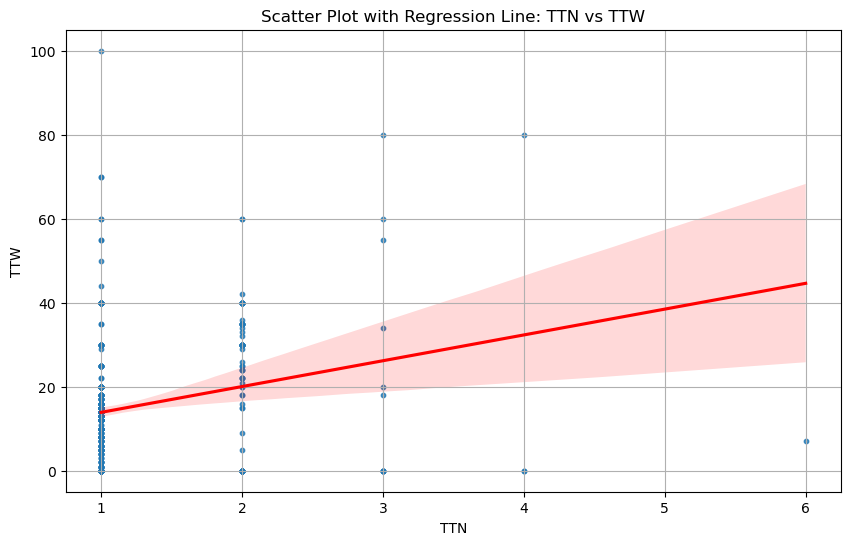

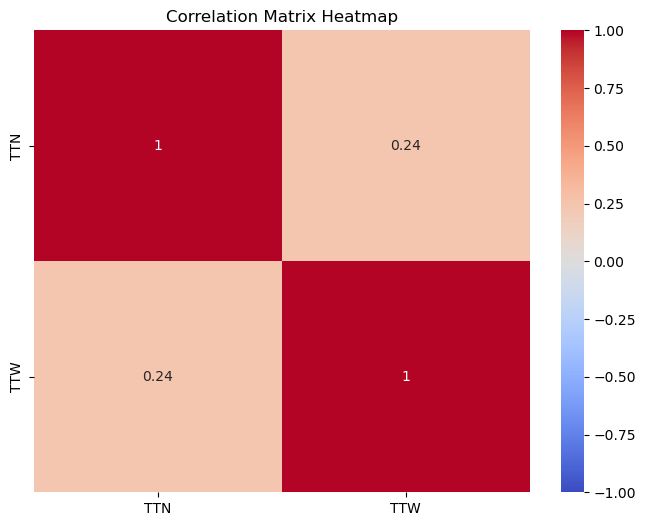

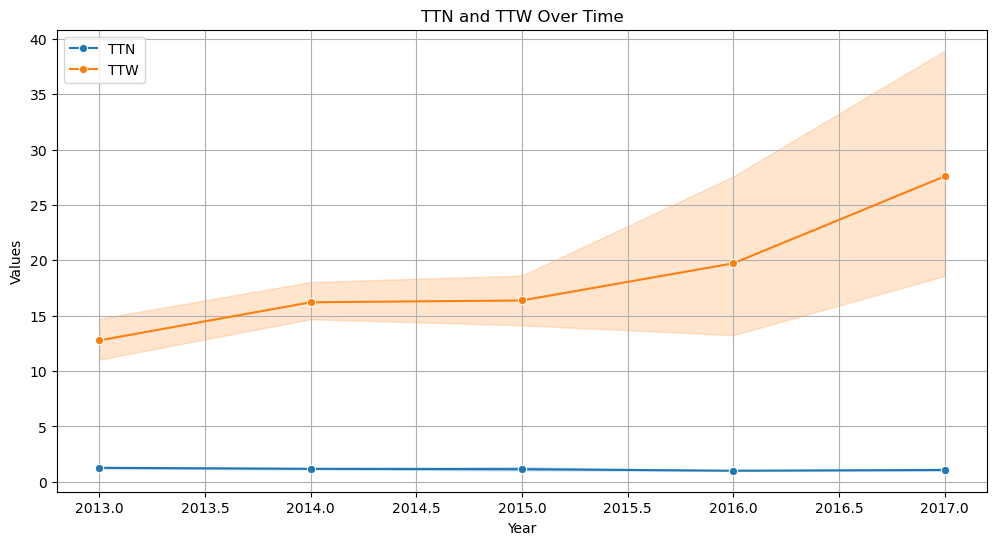

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert non-numeric values to NaN
df['TTN'] = pd.to_numeric(df['TTN'], errors='coerce')
df['TTW'] = pd.to_numeric(df['TTW'], errors='coerce')

# Extract the Year from the Date column and create a new Year column
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')
df['Year'] = df['Date'].dt.year

# Descriptive Statistics
summary_statistics = df[['TTN', 'TTW']].describe()
summary_statistics.loc['median'] = df[['TTN', 'TTW']].median()
summary_statistics.loc['mode'] = df[['TTN', 'TTW']].mode().iloc[0]
summary_statistics.loc['std'] = df[['TTN', 'TTW']].std()
summary_statistics.loc['var'] = df[['TTN', 'TTW']].var()
summary_statistics.loc['skew'] = df[['TTN', 'TTW']].skew()
summary_statistics.loc['kurt'] = df[['TTN', 'TTW']].kurt()

# Additional statistics
summary_statistics.loc['Q1'] = df[['TTN', 'TTW']].quantile(0.25)
summary_statistics.loc['Q3'] = df[['TTN', 'TTW']].quantile(0.75)
summary_statistics.loc['IQR'] = summary_statistics.loc['Q3'] - summary_statistics.loc['Q1']

print("Summary Statistics:")
print(summary_statistics)

# Detect outliers using the IQR method
Q1_TTN = summary_statistics.loc['Q1', 'TTN']
Q3_TTN = summary_statistics.loc['Q3', 'TTN']
IQR_TTN = summary_statistics.loc['IQR', 'TTN']
outliers_TTN = df[(df['TTN'] < (Q1_TTN - 1.5 * IQR_TTN)) | (df['TTN'] > (Q3_TTN + 1.5 * IQR_TTN))]

Q1_TTW = summary_statistics.loc['Q1', 'TTW']
Q3_TTW = summary_statistics.loc['Q3', 'TTW']
IQR_TTW = summary_statistics.loc['IQR', 'TTW']
outliers_TTW = df[(df['TTW'] < (Q1_TTW - 1.5 * IQR_TTW)) | (df['TTW'] > (Q3_TTW + 1.5 * IQR_TTW))]

print("Outliers in TTN:")
print(outliers_TTN)
print("Outliers in TTW:")
print(outliers_TTW)

# Visualization of distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['TTN'].dropna(), kde=True)
plt.title('Distribution of TTN')
plt.xlabel('TTN')

plt.subplot(1, 2, 2)
sns.histplot(df['TTW'].dropna(), kde=True)
plt.title('Distribution of TTW')
plt.xlabel('TTW')

plt.tight_layout()
plt.show()

# Box plots for detecting outliers visually
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['TTN'])
plt.title('Box Plot of TTN')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['TTW'])
plt.title('Box Plot of TTW')

plt.tight_layout()
plt.show()

# Correlation analysis
correlation = df[['TTN', 'TTW']].corr()
print("Correlation between TTN and TTW:")
print(correlation)

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='TTN', y='TTW', data=df, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('Scatter Plot with Regression Line: TTN vs TTW')
plt.xlabel('TTN')
plt.ylabel('TTW')
plt.grid(True)
plt.show()

# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Plot TTN and TTW over time using Year column
df_cleaned = df.dropna(subset=['Year'])

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_cleaned, x='Year', y='TTN', marker='o', label='TTN')
sns.lineplot(data=df_cleaned, x='Year', y='TTW', marker='o', label='TTW')
plt.title('TTN and TTW Over Time')
plt.xlabel('Year')
plt.ylabel('Values')
plt.grid(True)
plt.legend()
plt.show()

Trends by Observer:
      Observer       TTN        TTW
0        Iqrar  1.073394  11.067308
1       Ismail  1.287129   5.415842
2        Nisar  1.000000   6.500000
3  Shah Zameen  1.238298  20.487821
4   Syed Zaman  1.138889  18.260870


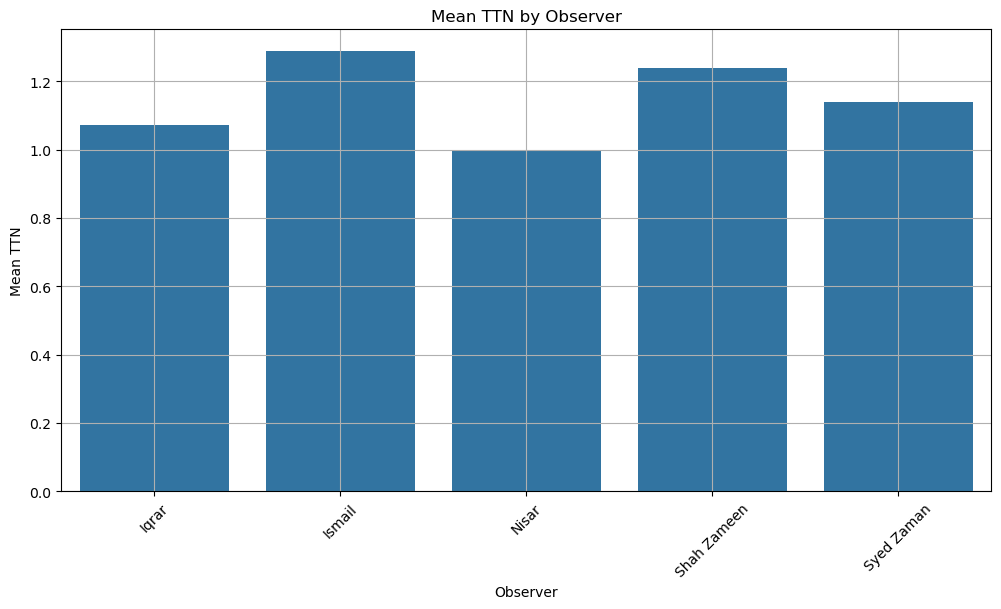

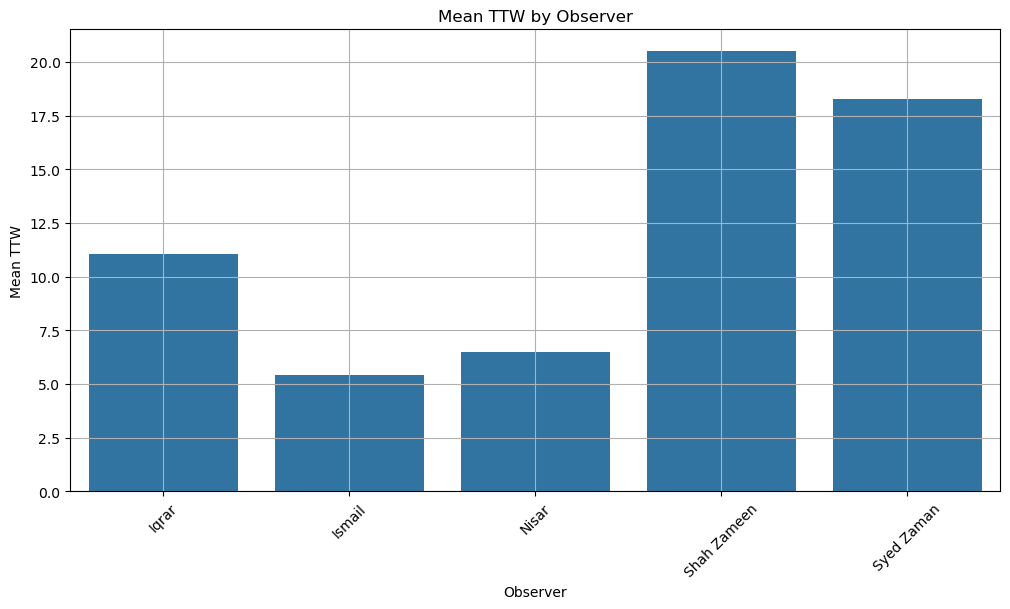

Seasonal Trends by Fishing Method:
   Fishing_Method  Season       TTN        TTW
0            BSGN  Summer       NaN        NaN
1            BSGN  Winter  1.250000  15.500000
2            SUBS    Fall  1.000000  12.428571
3            SUBS  Spring  1.384615   9.818182
4            SUBS  Summer  1.200000  17.900000
5            SUBS  Winter  1.111111  20.666667
6            SUGN    Fall  1.288288   9.081081
7            SUGN  Spring  1.267974  14.801325
8            SUGN  Summer  1.187500  15.875000
9            SUGN  Winter  1.127820  18.097744
10           SUSS    Fall  1.000000  20.696875
11           SUSS  Spring  1.250000  21.750000
12           SUSS  Winter  1.000000  14.352941
13           TRAW    Fall  1.000000  23.333333
14           TRAW  Spring  1.000000  30.000000
15           TRAW  Winter  1.000000  31.285714


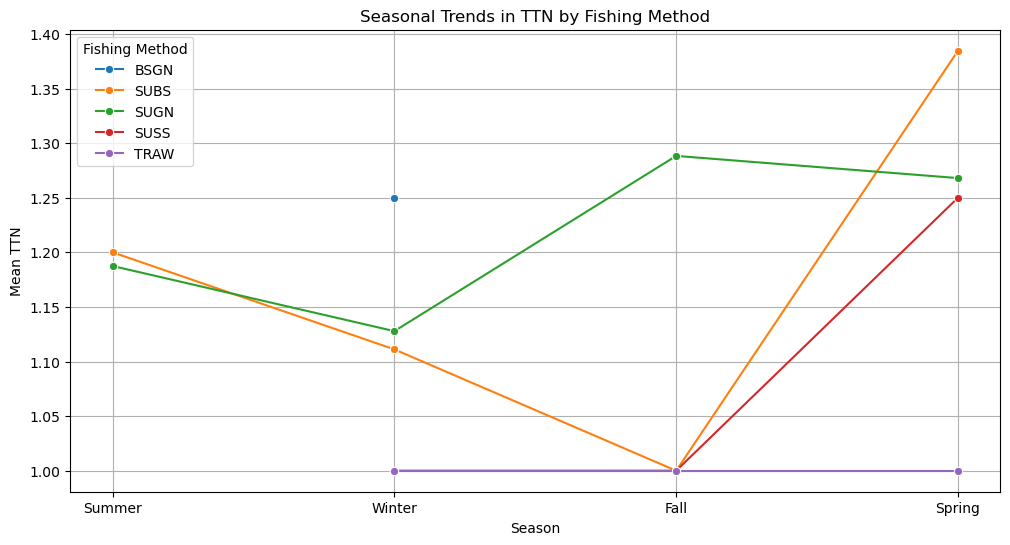

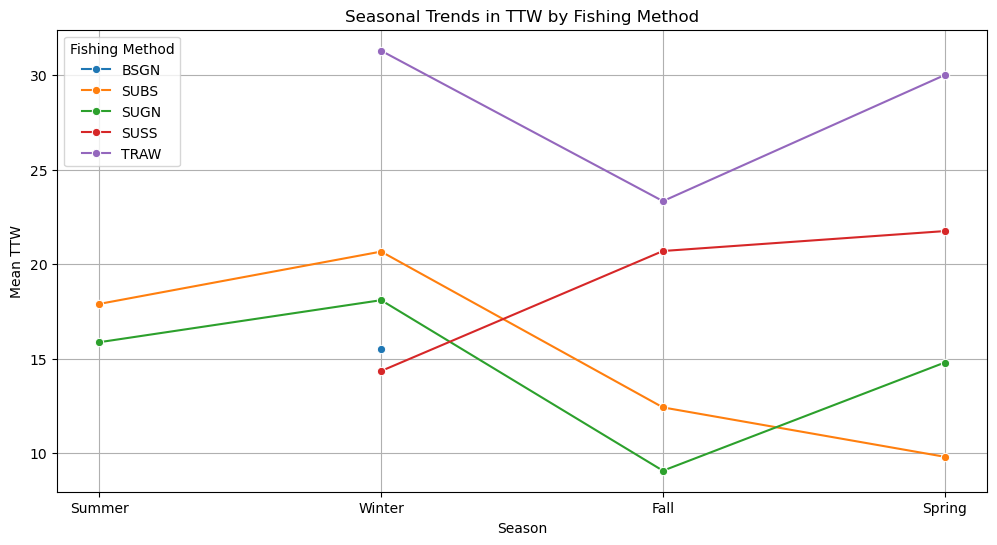

Seasonal Trends by Observer:
       Observer  Season       TTN        TTW
0         Iqrar    Fall  1.031250  10.535714
1         Iqrar  Spring  1.179487  10.921053
2         Iqrar  Summer  1.000000  11.857143
3         Iqrar  Winter  1.000000  11.548387
4        Ismail    Fall  1.400000   0.000000
5        Ismail  Spring  1.280000   3.520000
6        Ismail  Summer  1.000000   0.000000
7        Ismail  Winter  1.080000  18.360000
8         Nisar    Fall  1.000000  12.500000
9         Nisar  Spring       NaN        NaN
10        Nisar  Summer  1.000000   0.000000
11        Nisar  Winter  1.000000   1.000000
12  Shah Zameen    Fall  1.161290  21.179839
13  Shah Zameen  Spring  1.378378  19.164384
14  Shah Zameen  Summer  1.250000  22.750000
15  Shah Zameen  Winter  1.172414  20.793103
16   Syed Zaman    Fall  1.100000  15.000000
17   Syed Zaman  Spring  1.151515  18.000000
18   Syed Zaman  Summer  1.500000  19.250000
19   Syed Zaman  Winter  1.080000  19.600000


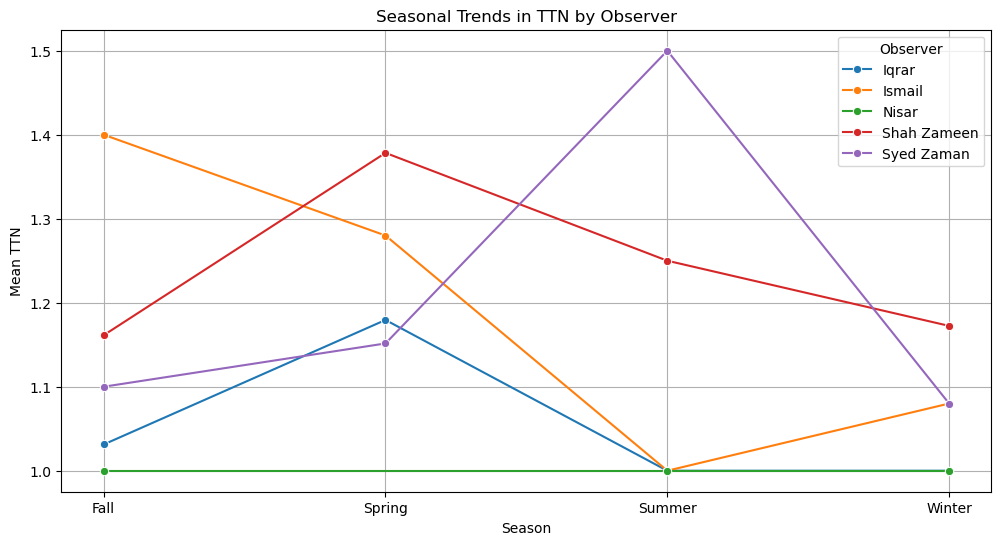

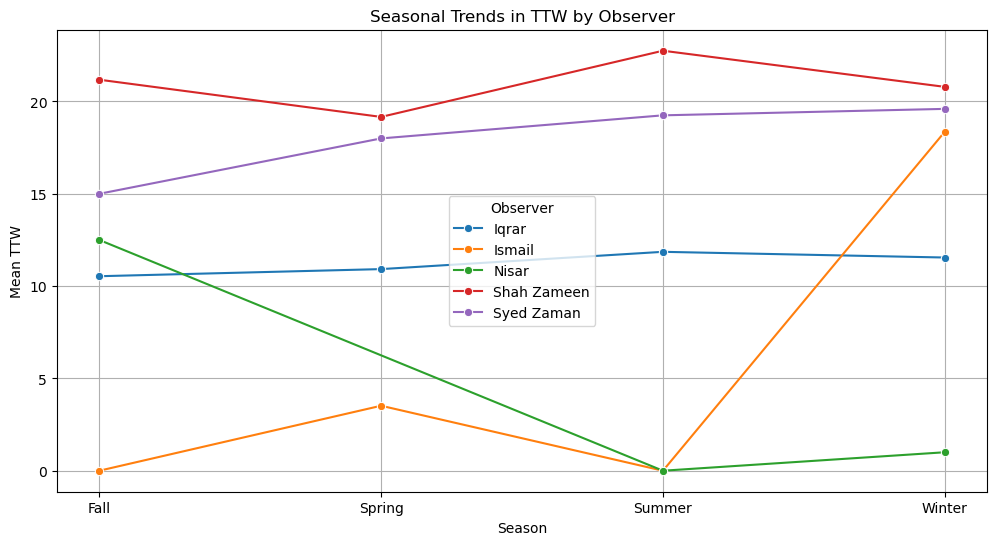

Outliers in Seasonal Trends (TTN):
Empty DataFrame
Columns: [Season, TTN, TTW]
Index: []
Outliers in Seasonal Trends (TTW):
Empty DataFrame
Columns: [Season, TTN, TTW]
Index: []
Seasonal Trends:
   Season       TTN        TTW
0    Fall  1.202532  11.719935
1  Spring  1.274854  14.730539
2  Summer  1.192308  16.653846
3  Winter  1.111765  18.341176


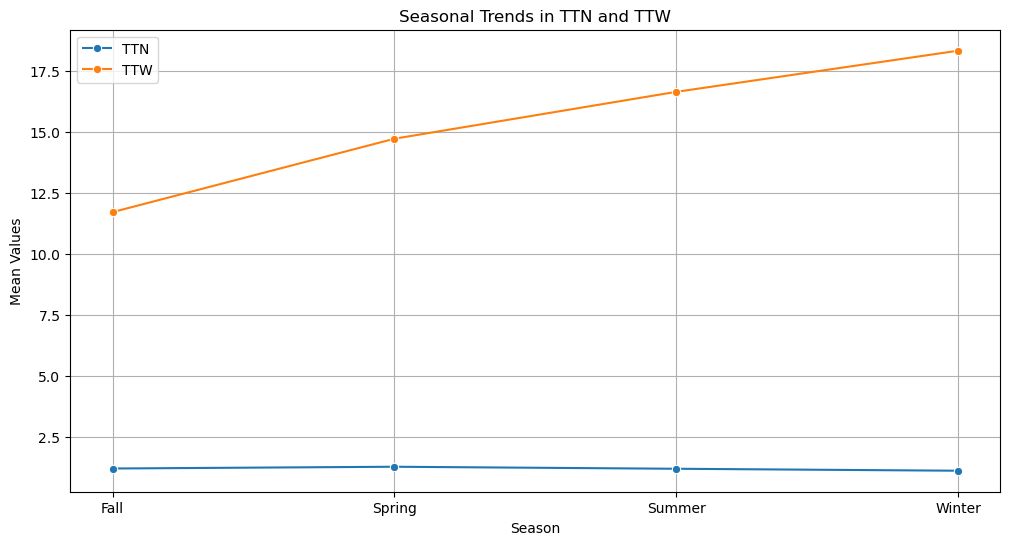

Annual Trends:
   Year       TTN        TTW
0  2013  1.262931  12.766234
1  2014  1.173184  16.207865
2  2015  1.138889  16.371429
3  2016  1.000000  19.726000
4  2017  1.066667  27.583333


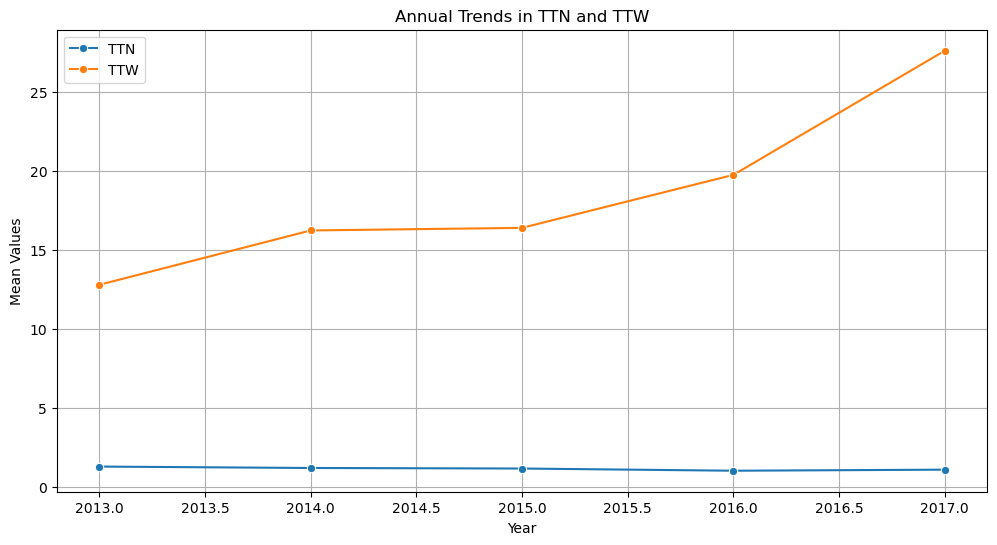

Annual Trends by Fishing Method:
   Fishing_Method  Year       TTN        TTW
0            BSGN  2013  1.250000  15.500000
1            BSGN  2015       NaN        NaN
2            SUBS  2015  1.333333  13.000000
3            SUBS  2016  1.000000   5.307692
4            SUBS  2017  1.066667  27.583333
5            SUGN  2013  1.263158  12.718062
6            SUGN  2014  1.185629  16.674699
7            SUGN  2015  1.111111  13.833333
8            SUSS  2014  1.000000   9.750000
9            SUSS  2015  1.058824  15.294118
10           SUSS  2016  1.000000  35.643750
11           TRAW  2015  1.000000  24.375000
12           TRAW  2016  1.000000  34.750000


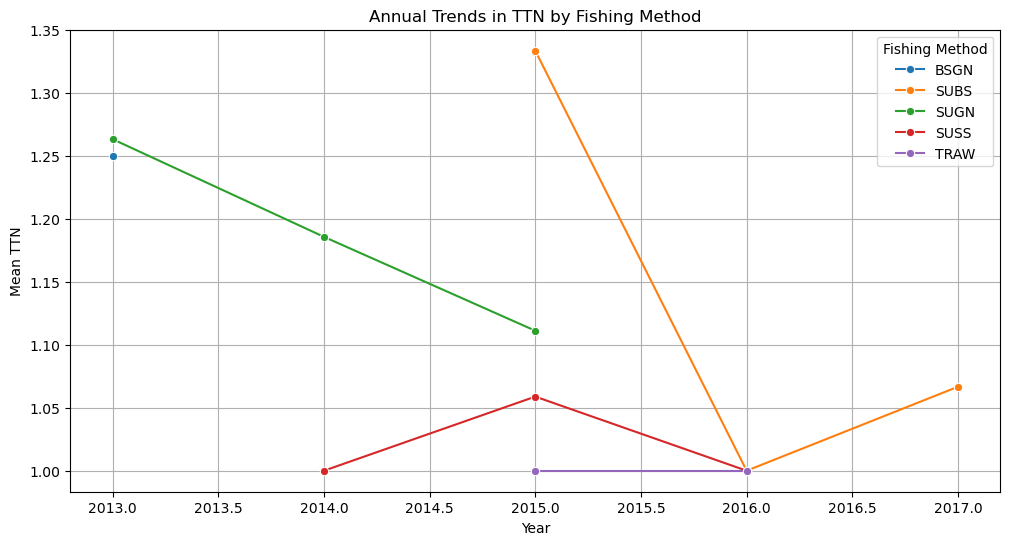

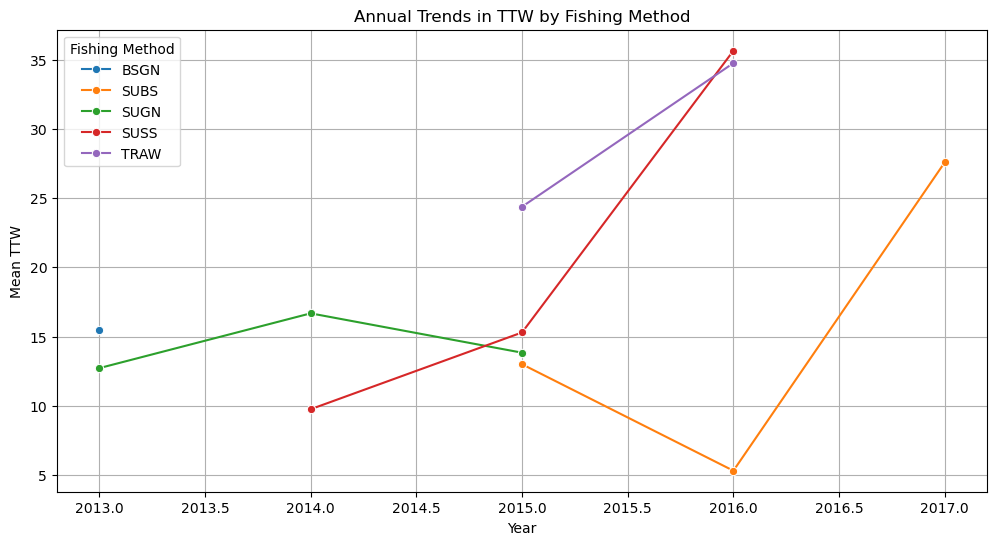

Annual Trends by Observer:
       Observer  Year       TTN        TTW
0         Iqrar  2013  1.076923  12.358974
1         Iqrar  2014  1.000000  10.638889
2         Iqrar  2015  1.227273  11.500000
3         Iqrar  2016  1.000000   6.222222
4         Iqrar  2017  1.000000        NaN
5        Ismail  2013  1.325581   4.372093
6        Ismail  2014  1.066667  11.400000
7         Nisar  2014       NaN        NaN
8         Nisar  2015  1.000000  10.400000
9         Nisar  2016  1.000000   0.000000
10        Nisar  2017       NaN        NaN
11  Shah Zameen  2013  1.302326  20.776471
12  Shah Zameen  2014  1.284211  17.852632
13  Shah Zameen  2015  1.064516  19.000000
14  Shah Zameen  2016  1.000000  35.345833
15  Shah Zameen  2017  1.090909  29.000000
16   Syed Zaman  2013  1.190476  15.476190
17   Syed Zaman  2014  1.090909  19.843750
18   Syed Zaman  2015  1.214286  19.642857
19   Syed Zaman  2016  1.000000  13.000000
20   Syed Zaman  2017  1.000000  12.000000


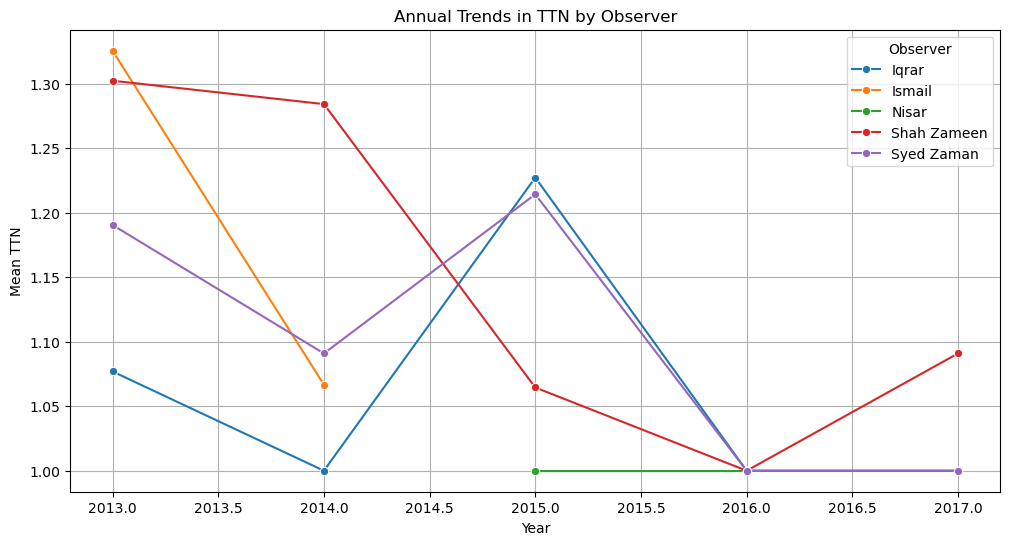

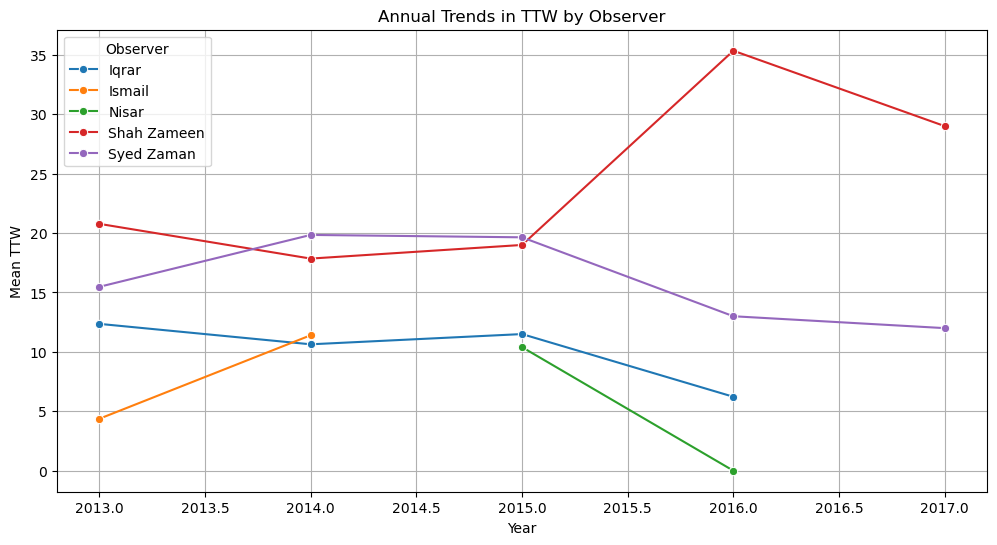

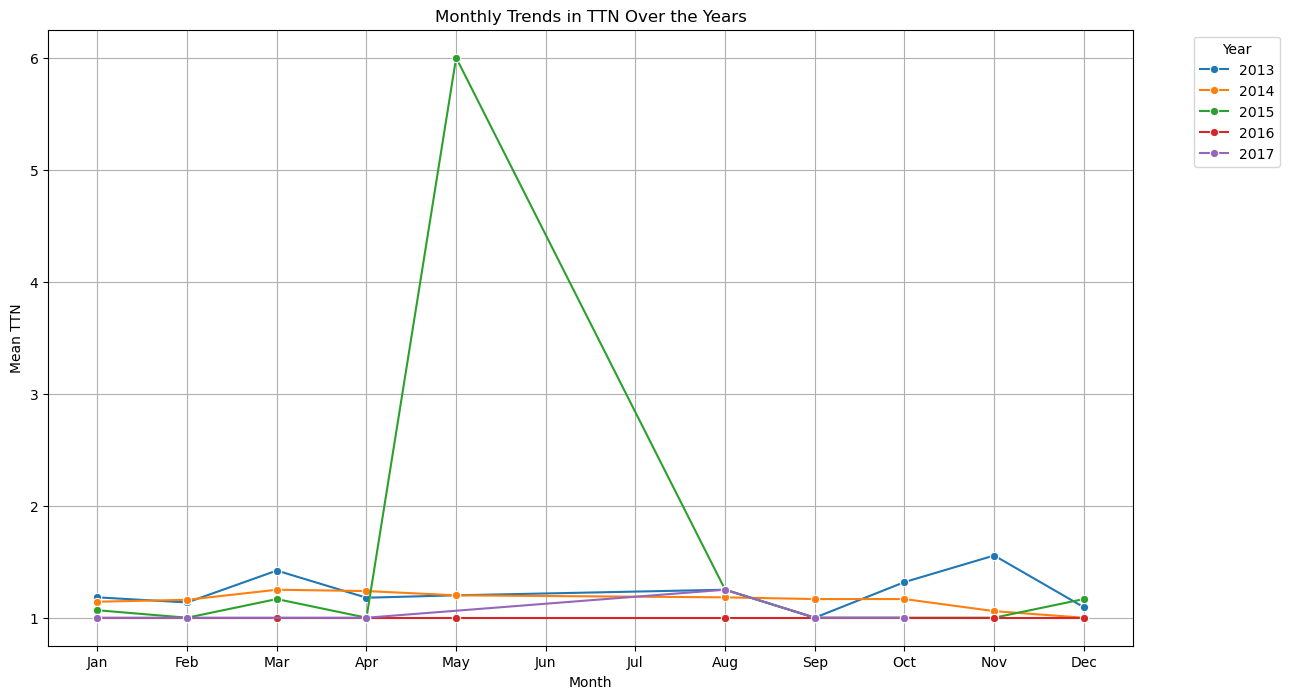

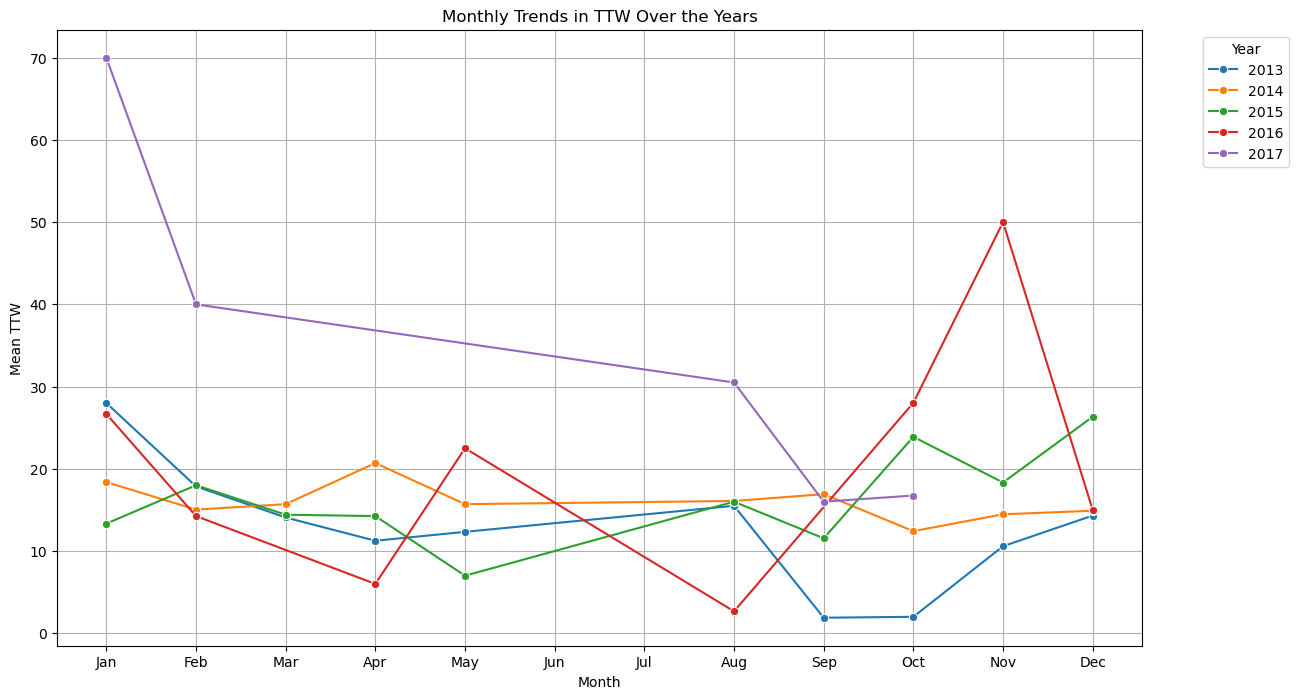

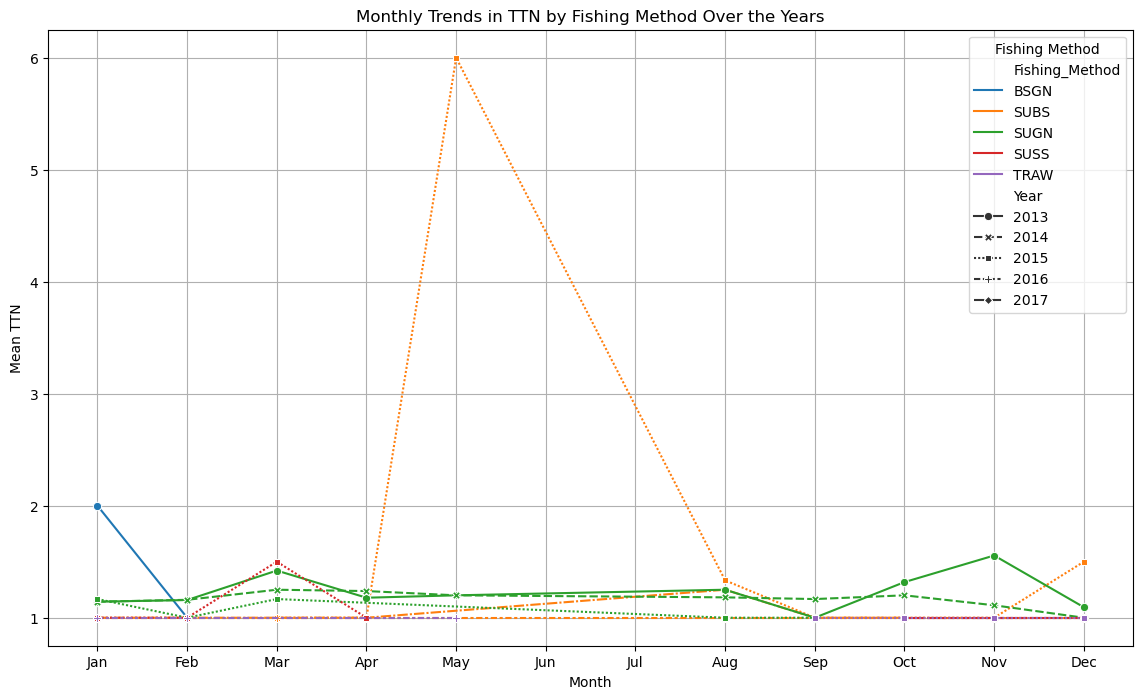

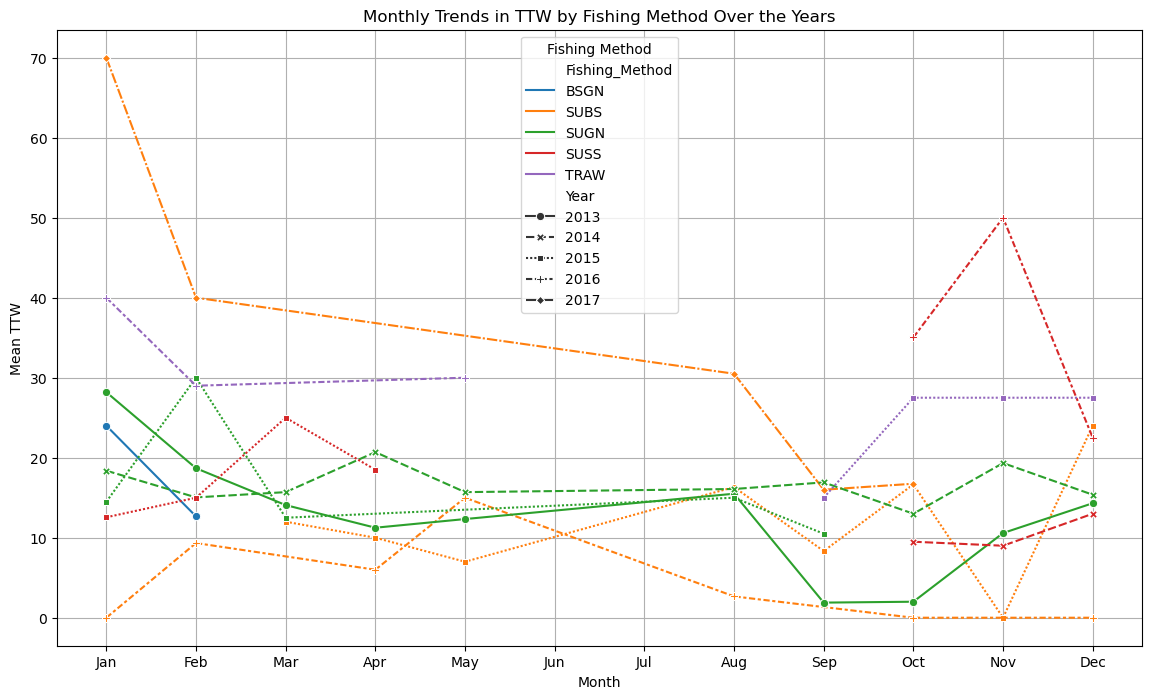

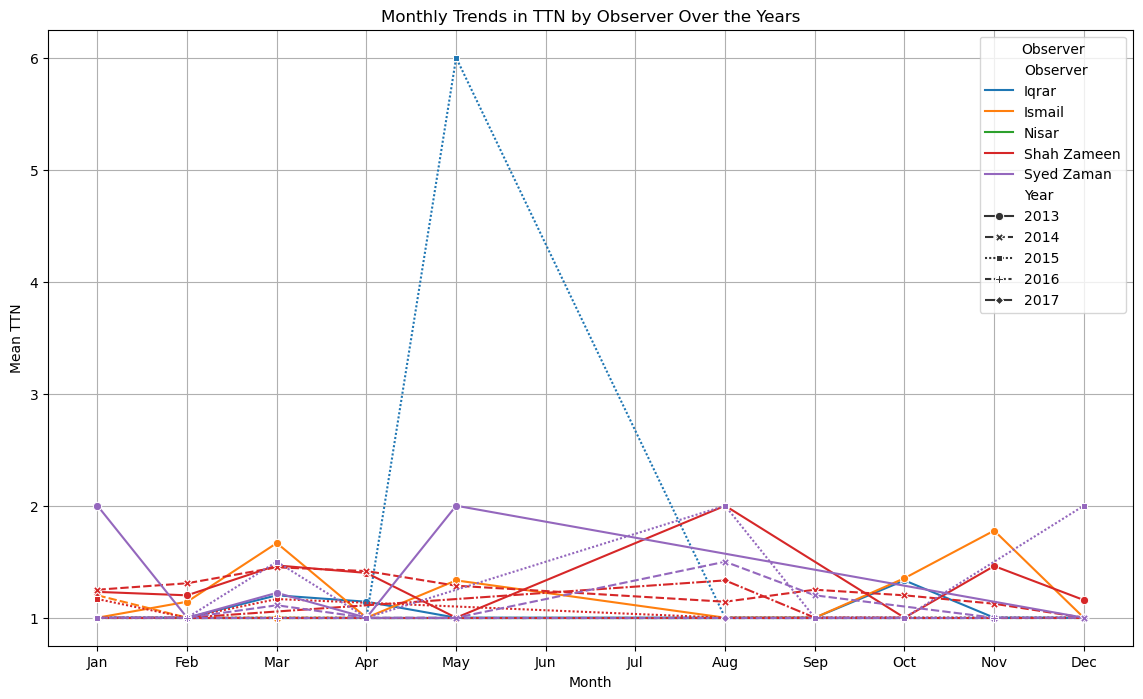

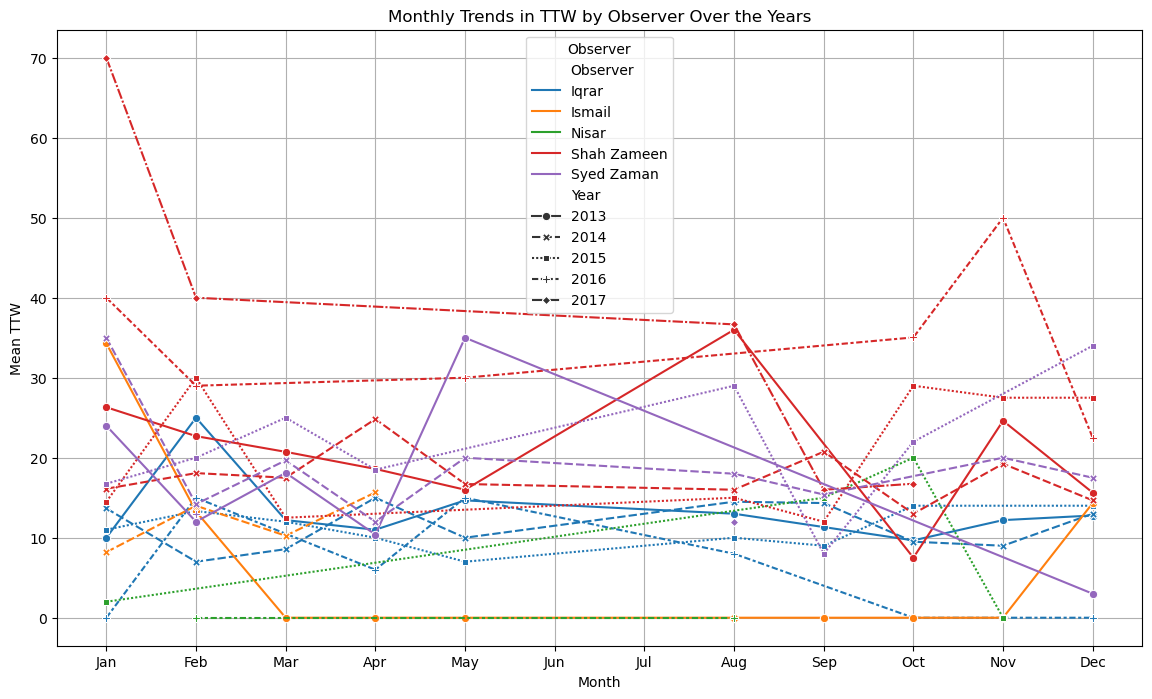

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Convert non-numeric values to NaN
df['TTN'] = pd.to_numeric(df['TTN'], errors='coerce')
df['TTW'] = pd.to_numeric(df['TTW'], errors='coerce')

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Filter out rows where 'Date' is NaT
df_cleaned = df.dropna(subset=['Date'])

# Add Month and Year columns
df_cleaned['Month'] = df_cleaned['Date'].dt.month
df_cleaned['Year'] = df_cleaned['Date'].dt.year

# Define fishing seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df_cleaned['Season'] = df_cleaned['Month'].apply(get_season)

# Trend analysis by Observer
if 'Observer' in df_cleaned.columns:
    observer_trends = df_cleaned.groupby('Observer')[['TTN', 'TTW']].mean().reset_index()

    print("Trends by Observer:")
    print(observer_trends)

    # Plot trends by Observer
    plt.figure(figsize=(12, 6))
    sns.barplot(data=observer_trends, x='Observer', y='TTN')
    plt.title('Mean TTN by Observer')
    plt.xlabel('Observer')
    plt.ylabel('Mean TTN')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.barplot(data=observer_trends, x='Observer', y='TTW')
    plt.title('Mean TTW by Observer')
    plt.xlabel('Observer')
    plt.ylabel('Mean TTW')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Seasonal trend analysis by Fishing Method
seasonal_trends_method = df_cleaned.groupby(['Fishing_Method', 'Season'])[['TTN', 'TTW']].mean().reset_index()

print("Seasonal Trends by Fishing Method:")
print(seasonal_trends_method)

# Plot seasonal trends by fishing method
plt.figure(figsize=(12, 6))
sns.lineplot(data=seasonal_trends_method, x='Season', y='TTN', hue='Fishing_Method', marker='o')
plt.title('Seasonal Trends in TTN by Fishing Method')
plt.xlabel('Season')
plt.ylabel('Mean TTN')
plt.grid(True)
plt.legend(title='Fishing Method')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=seasonal_trends_method, x='Season', y='TTW', hue='Fishing_Method', marker='o')
plt.title('Seasonal Trends in TTW by Fishing Method')
plt.xlabel('Season')
plt.ylabel('Mean TTW')
plt.grid(True)
plt.legend(title='Fishing Method')
plt.show()

# Seasonal trend analysis by Observer
if 'Observer' in df_cleaned.columns:
    seasonal_trends_observer = df_cleaned.groupby(['Observer', 'Season'])[['TTN', 'TTW']].mean().reset_index()

    print("Seasonal Trends by Observer:")
    print(seasonal_trends_observer)

    # Plot seasonal trends by observer
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=seasonal_trends_observer, x='Season', y='TTN', hue='Observer', marker='o')
    plt.title('Seasonal Trends in TTN by Observer')
    plt.xlabel('Season')
    plt.ylabel('Mean TTN')
    plt.grid(True)
    plt.legend(title='Observer')
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=seasonal_trends_observer, x='Season', y='TTW', hue='Observer', marker='o')
    plt.title('Seasonal Trends in TTW by Observer')
    plt.xlabel('Season')
    plt.ylabel('Mean TTW')
    plt.grid(True)
    plt.legend(title='Observer')
    plt.show()

# Detect outliers in seasonal trends
seasonal_trends = df_cleaned.groupby('Season')[['TTN', 'TTW']].mean().reset_index()

Q1_TTN_seasonal = seasonal_trends['TTN'].quantile(0.25)
Q3_TTN_seasonal = seasonal_trends['TTN'].quantile(0.75)
IQR_TTN_seasonal = Q3_TTN_seasonal - Q1_TTN_seasonal
outliers_TTN_seasonal = seasonal_trends[(seasonal_trends['TTN'] < (Q1_TTN_seasonal - 1.5 * IQR_TTN_seasonal)) | (seasonal_trends['TTN'] > (Q3_TTN_seasonal + 1.5 * IQR_TTN_seasonal))]

Q1_TTW_seasonal = seasonal_trends['TTW'].quantile(0.25)
Q3_TTW_seasonal = seasonal_trends['TTW'].quantile(0.75)
IQR_TTW_seasonal = Q3_TTW_seasonal - Q1_TTW_seasonal
outliers_TTW_seasonal = seasonal_trends[(seasonal_trends['TTW'] < (Q1_TTW_seasonal - 1.5 * IQR_TTW_seasonal)) | (seasonal_trends['TTW'] > (Q3_TTW_seasonal + 1.5 * IQR_TTW_seasonal))]

print("Outliers in Seasonal Trends (TTN):")
print(outliers_TTN_seasonal)
print("Outliers in Seasonal Trends (TTW):")
print(outliers_TTW_seasonal)

print("Seasonal Trends:")
print(seasonal_trends)

# Plot seasonal trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=seasonal_trends, x='Season', y='TTN', marker='o', label='TTN')
sns.lineplot(data=seasonal_trends, x='Season', y='TTW', marker='o', label='TTW')
plt.title('Seasonal Trends in TTN and TTW')
plt.xlabel('Season')
plt.ylabel('Mean Values')
plt.grid(True)
plt.legend()
plt.show()

# Annual trend analysis
annual_trends = df_cleaned.groupby('Year')[['TTN', 'TTW']].mean().reset_index()

print("Annual Trends:")
print(annual_trends)

# Plot annual trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=annual_trends, x='Year', y='TTN', marker='o', label='TTN')
sns.lineplot(data=annual_trends, x='Year', y='TTW', marker='o', label='TTW')
plt.title('Annual Trends in TTN and TTW')
plt.xlabel('Year')
plt.ylabel('Mean Values')
plt.grid(True)
plt.legend()
plt.show()

# Annual trend analysis by Fishing Method
annual_trends_method = df_cleaned.groupby(['Fishing_Method', 'Year'])[['TTN', 'TTW']].mean().reset_index()

print("Annual Trends by Fishing Method:")
print(annual_trends_method)

# Plot annual trends by fishing method
plt.figure(figsize=(12, 6))
sns.lineplot(data=annual_trends_method, x='Year', y='TTN', hue='Fishing_Method', marker='o')
plt.title('Annual Trends in TTN by Fishing Method')
plt.xlabel('Year')
plt.ylabel('Mean TTN')
plt.grid(True)
plt.legend(title='Fishing Method')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=annual_trends_method, x='Year', y='TTW', hue='Fishing_Method', marker='o')
plt.title('Annual Trends in TTW by Fishing Method')
plt.xlabel('Year')
plt.ylabel('Mean TTW')
plt.grid(True)
plt.legend(title='Fishing Method')
plt.show()

# Annual trend analysis by Observer
if 'Observer' in df_cleaned.columns:
    annual_trends_observer = df_cleaned.groupby(['Observer', 'Year'])[['TTN', 'TTW']].mean().reset_index()

    print("Annual Trends by Observer:")
    print(annual_trends_observer)

    # Plot annual trends by observer
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=annual_trends_observer, x='Year', y='TTN', hue='Observer', marker='o')
    plt.title('Annual Trends in TTN by Observer')
    plt.xlabel('Year')
    plt.ylabel('Mean TTN')
    plt.grid(True)
    plt.legend(title='Observer')
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=annual_trends_observer, x='Year', y='TTW', hue='Observer', marker='o')
    plt.title('Annual Trends in TTW by Observer')
    plt.xlabel('Year')
    plt.ylabel('Mean TTW')
    plt.grid(True)
    plt.legend(title='Observer')
    plt.show()

# Monthly trend analysis over the years
monthly_trends_years_TTN = df_cleaned.groupby(['Year', 'Month'])['TTN'].mean().reset_index()
monthly_trends_years_TTW = df_cleaned.groupby(['Year', 'Month'])['TTW'].mean().reset_index()

# Plot monthly trends over the years for TTN
plt.figure(figsize=(14, 8))
sns.lineplot(data=monthly_trends_years_TTN, x='Month', y='TTN', hue='Year', palette='tab10', marker='o')
plt.title('Monthly Trends in TTN Over the Years')
plt.xlabel('Month')
plt.ylabel('Mean TTN')
plt.xticks(ticks=np.arange(1, 13, 1), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Plot monthly trends over the years for TTW
plt.figure(figsize=(14, 8))
sns.lineplot(data=monthly_trends_years_TTW, x='Month', y='TTW', hue='Year', palette='tab10', marker='o')
plt.title('Monthly Trends in TTW Over the Years')
plt.xlabel('Month')
plt.ylabel('Mean TTW')
plt.xticks(ticks=np.arange(1, 13, 1), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Monthly trend analysis by Fishing Method
monthly_trends_method_TTN = df_cleaned.groupby(['Fishing_Method', 'Year', 'Month'])['TTN'].mean().reset_index()
monthly_trends_method_TTW = df_cleaned.groupby(['Fishing_Method', 'Year', 'Month'])['TTW'].mean().reset_index()

# Plot monthly trends by fishing method for TTN
plt.figure(figsize=(14, 8))
sns.lineplot(data=monthly_trends_method_TTN, x='Month', y='TTN', hue='Fishing_Method', style='Year', markers=True, palette='tab10')
plt.title('Monthly Trends in TTN by Fishing Method Over the Years')
plt.xlabel('Month')
plt.ylabel('Mean TTN')
plt.xticks(ticks=np.arange(1, 13, 1), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.legend(title='Fishing Method')
plt.show()

# Plot monthly trends by fishing method for TTW
plt.figure(figsize=(14, 8))
sns.lineplot(data=monthly_trends_method_TTW, x='Month', y='TTW', hue='Fishing_Method', style='Year', markers=True, palette='tab10')
plt.title('Monthly Trends in TTW by Fishing Method Over the Years')
plt.xlabel('Month')
plt.ylabel('Mean TTW')
plt.xticks(ticks=np.arange(1, 13, 1), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.legend(title='Fishing Method')
plt.show()

# Monthly trend analysis by Observer
if 'Observer' in df_cleaned.columns:
    monthly_trends_observer_TTN = df_cleaned.groupby(['Observer', 'Year', 'Month'])['TTN'].mean().reset_index()
    monthly_trends_observer_TTW = df_cleaned.groupby(['Observer', 'Year', 'Month'])['TTW'].mean().reset_index()

    # Plot monthly trends by observer for TTN
    plt.figure(figsize=(14, 8))
    sns.lineplot(data=monthly_trends_observer_TTN, x='Month', y='TTN', hue='Observer', style='Year', markers=True, palette='tab10')
    plt.title('Monthly Trends in TTN by Observer Over the Years')
    plt.xlabel('Month')
    plt.ylabel('Mean TTN')
    plt.xticks(ticks=np.arange(1, 13, 1), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.grid(True)
    plt.legend(title='Observer')
    plt.show()

    # Plot monthly trends by observer for TTW
    plt.figure(figsize=(14, 8))
    sns.lineplot(data=monthly_trends_observer_TTW, x='Month', y='TTW', hue='Observer', style='Year', markers=True, palette='tab10')
    plt.title('Monthly Trends in TTW by Observer Over the Years')
    plt.xlabel('Month')
    plt.ylabel('Mean TTW')
    plt.xticks(ticks=np.arange(1, 13, 1), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.grid(True)
    plt.legend(title='Observer')
    plt.show()


Annual Trends:
   Year       TTN        TTW
0  2013  1.262931  12.766234
1  2014  1.173184  16.207865
2  2015  1.138889  16.371429
3  2016  1.000000  19.726000
4  2017  1.066667  27.583333


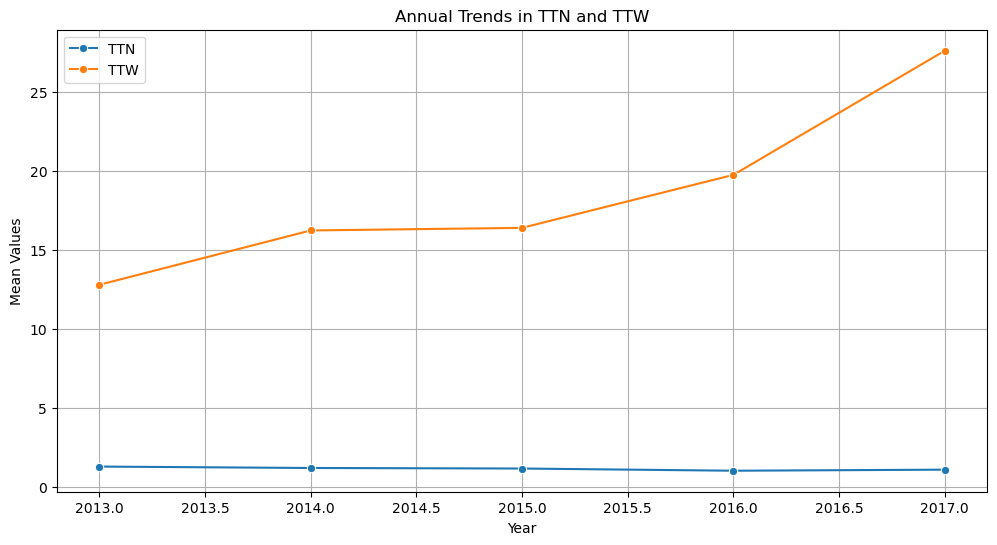

Outliers in Annual Trends (TTN):
Empty DataFrame
Columns: [Year, TTN, TTW]
Index: []
Outliers in Annual Trends (TTW):
   Year       TTN        TTW
4  2017  1.066667  27.583333
Seasonal Trends:
    Month       TTN        TTW
0       1  1.129032  21.806452
1       2  1.122807  16.771930
2       3  1.307692  14.844444
3       4  1.175439  14.618182
4       5  1.391304  14.545455
5       6       NaN        NaN
6       7       NaN        NaN
7       8  1.192308  16.653846
8       9  1.045455   9.209302
9      10  1.163636  11.829808
10     11  1.355932  13.482759
11     12  1.078431  15.882353


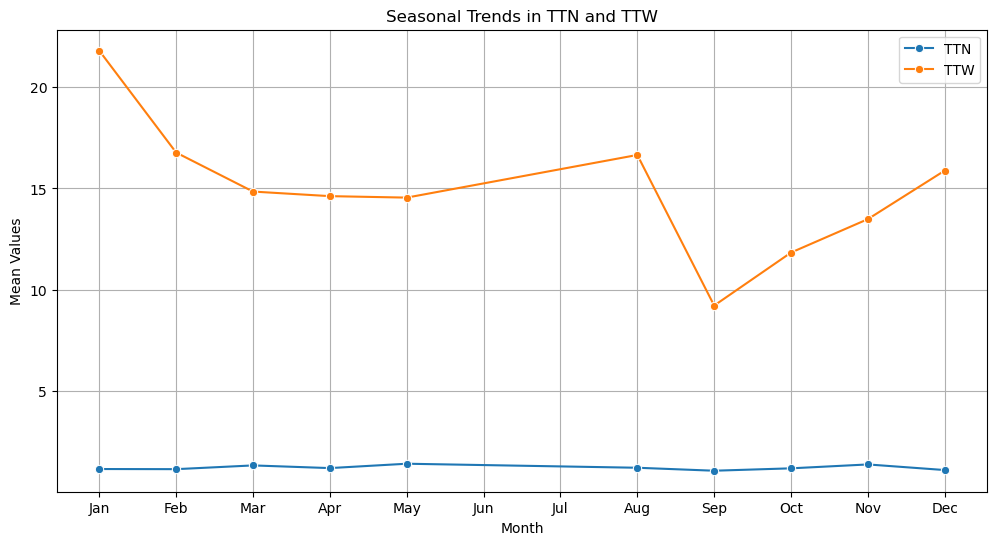

Outliers in Seasonal Trends (TTN):
Empty DataFrame
Columns: [Month, TTN, TTW]
Index: []
Outliers in Seasonal Trends (TTW):
   Month       TTN        TTW
0      1  1.129032  21.806452
8      9  1.045455   9.209302


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Convert non-numeric values to NaN
df['TTN'] = pd.to_numeric(df['TTN'], errors='coerce')
df['TTW'] = pd.to_numeric(df['TTW'], errors='coerce')

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Filter out rows where 'Date' is NaT
df_cleaned = df.dropna(subset=['Date'])

# Annual trend analysis
annual_trends = df_cleaned.groupby(df_cleaned['Date'].dt.year)[['TTN', 'TTW']].mean().reset_index()
annual_trends = annual_trends.rename(columns={'Date': 'Year'})

print("Annual Trends:")
print(annual_trends)

# Plot annual trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=annual_trends, x='Year', y='TTN', marker='o', label='TTN')
sns.lineplot(data=annual_trends, x='Year', y='TTW', marker='o', label='TTW')
plt.title('Annual Trends in TTN and TTW')
plt.xlabel('Year')
plt.ylabel('Mean Values')
plt.grid(True)
plt.legend()
plt.show()

# Detect outliers in annual trends
Q1_TTN_annual = annual_trends['TTN'].quantile(0.25)
Q3_TTN_annual = annual_trends['TTN'].quantile(0.75)
IQR_TTN_annual = Q3_TTN_annual - Q1_TTN_annual
outliers_TTN_annual = annual_trends[(annual_trends['TTN'] < (Q1_TTN_annual - 1.5 * IQR_TTN_annual)) | (annual_trends['TTN'] > (Q3_TTN_annual + 1.5 * IQR_TTN_annual))]

Q1_TTW_annual = annual_trends['TTW'].quantile(0.25)
Q3_TTW_annual = annual_trends['TTW'].quantile(0.75)
IQR_TTW_annual = Q3_TTW_annual - Q1_TTW_annual
outliers_TTW_annual = annual_trends[(annual_trends['TTW'] < (Q1_TTW_annual - 1.5 * IQR_TTW_annual)) | (annual_trends['TTW'] > (Q3_TTW_annual + 1.5 * IQR_TTW_annual))]

print("Outliers in Annual Trends (TTN):")
print(outliers_TTN_annual)
print("Outliers in Annual Trends (TTW):")
print(outliers_TTW_annual)

# Seasonal trend analysis
df_cleaned['Month'] = df_cleaned['Date'].dt.month
seasonal_trends = df_cleaned.groupby('Month')[['TTN', 'TTW']].mean().reset_index()

print("Seasonal Trends:")
print(seasonal_trends)

# Plot seasonal trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=seasonal_trends, x='Month', y='TTN', marker='o', label='TTN')
sns.lineplot(data=seasonal_trends, x='Month', y='TTW', marker='o', label='TTW')
plt.title('Seasonal Trends in TTN and TTW')
plt.xlabel('Month')
plt.ylabel('Mean Values')
plt.xticks(ticks=np.arange(1, 13, 1), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.legend()
plt.show()

# Detect outliers in seasonal trends
Q1_TTN_seasonal = seasonal_trends['TTN'].quantile(0.25)
Q3_TTN_seasonal = seasonal_trends['TTN'].quantile(0.75)
IQR_TTN_seasonal = Q3_TTN_seasonal - Q1_TTN_seasonal
outliers_TTN_seasonal = seasonal_trends[(seasonal_trends['TTN'] < (Q1_TTN_seasonal - 1.5 * IQR_TTN_seasonal)) | (seasonal_trends['TTN'] > (Q3_TTN_seasonal + 1.5 * IQR_TTN_seasonal))]

Q1_TTW_seasonal = seasonal_trends['TTW'].quantile(0.25)
Q3_TTW_seasonal = seasonal_trends['TTW'].quantile(0.75)
IQR_TTW_seasonal = Q3_TTW_seasonal - Q1_TTW_seasonal
outliers_TTW_seasonal = seasonal_trends[(seasonal_trends['TTW'] < (Q1_TTW_seasonal - 1.5 * IQR_TTW_seasonal)) | (seasonal_trends['TTW'] > (Q3_TTW_seasonal + 1.5 * IQR_TTW_seasonal))]

print("Outliers in Seasonal Trends (TTN):")
print(outliers_TTN_seasonal)
print("Outliers in Seasonal Trends (TTW):")
print(outliers_TTW_seasonal)

Annual Trends:
   Year       TTN        TTW
0  2013  1.262931  12.766234
1  2014  1.173184  16.207865
2  2015  1.138889  16.371429
3  2016  1.000000  19.726000
4  2017  1.066667  27.583333


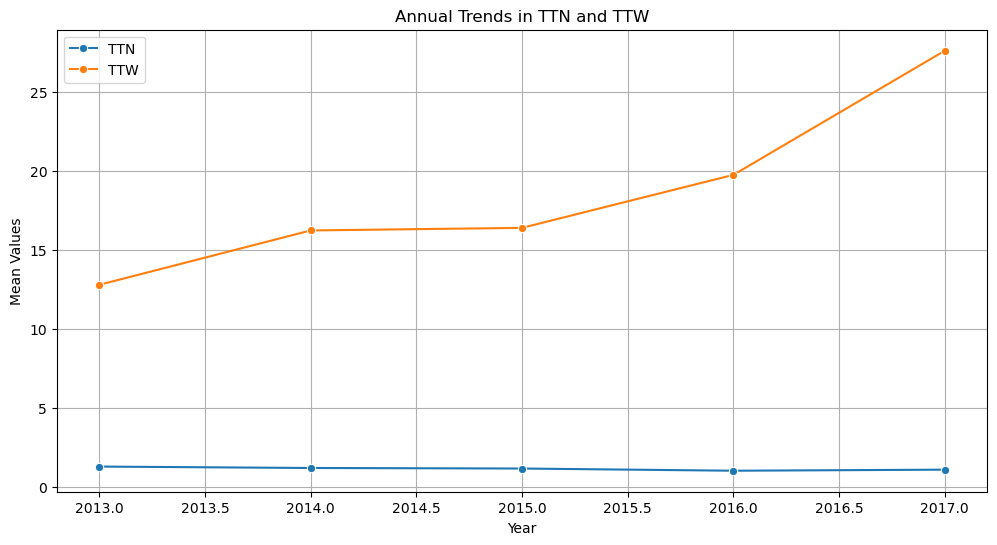

Outliers in Annual Trends (TTN):
Empty DataFrame
Columns: [Year, TTN, TTW]
Index: []
Outliers in Annual Trends (TTW):
   Year       TTN        TTW
4  2017  1.066667  27.583333
Seasonal Trends:
    Month       TTN        TTW
0       1  1.129032  21.806452
1       2  1.122807  16.771930
2       3  1.307692  14.844444
3       4  1.175439  14.618182
4       5  1.391304  14.545455
5       6       NaN        NaN
6       7       NaN        NaN
7       8  1.192308  16.653846
8       9  1.045455   9.209302
9      10  1.163636  11.829808
10     11  1.355932  13.482759
11     12  1.078431  15.882353


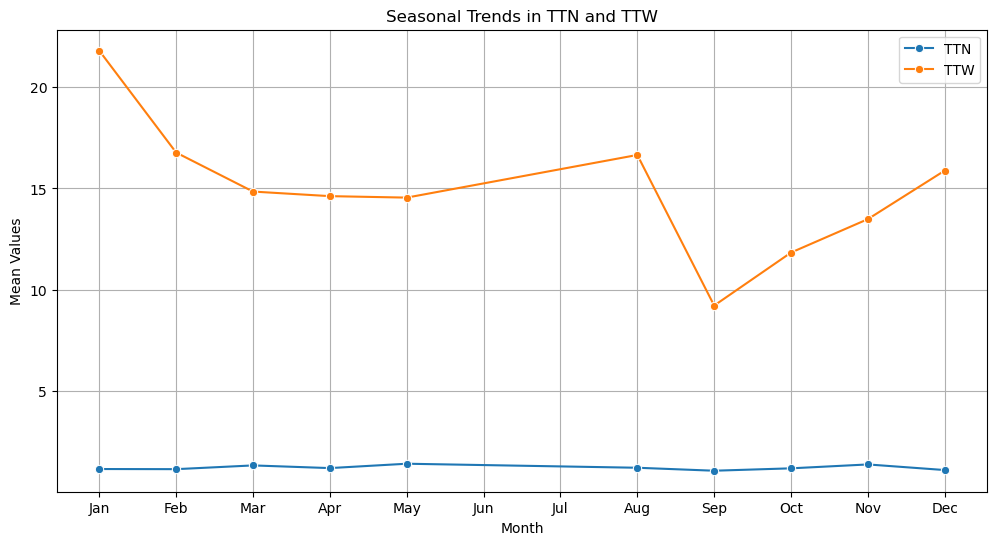

Outliers in Seasonal Trends (TTN):
Empty DataFrame
Columns: [Month, TTN, TTW]
Index: []
Outliers in Seasonal Trends (TTW):
   Month       TTN        TTW
0      1  1.129032  21.806452
8      9  1.045455   9.209302


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Convert non-numeric values to NaN
df['TTN'] = pd.to_numeric(df['TTN'], errors='coerce')
df['TTW'] = pd.to_numeric(df['TTW'], errors='coerce')

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Filter out rows where 'Date' is NaT
df_cleaned = df.dropna(subset=['Date'])

# Annual trend analysis
annual_trends = df_cleaned.groupby(df_cleaned['Date'].dt.year)[['TTN', 'TTW']].mean().reset_index()
annual_trends = annual_trends.rename(columns={'Date': 'Year'})

print("Annual Trends:")
print(annual_trends)

# Plot annual trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=annual_trends, x='Year', y='TTN', marker='o', label='TTN')
sns.lineplot(data=annual_trends, x='Year', y='TTW', marker='o', label='TTW')
plt.title('Annual Trends in TTN and TTW')
plt.xlabel('Year')
plt.ylabel('Mean Values')
plt.grid(True)
plt.legend()
plt.show()

# Detect outliers in annual trends
Q1_TTN_annual = annual_trends['TTN'].quantile(0.25)
Q3_TTN_annual = annual_trends['TTN'].quantile(0.75)
IQR_TTN_annual = Q3_TTN_annual - Q1_TTN_annual
outliers_TTN_annual = annual_trends[(annual_trends['TTN'] < (Q1_TTN_annual - 1.5 * IQR_TTN_annual)) | (annual_trends['TTN'] > (Q3_TTN_annual + 1.5 * IQR_TTN_annual))]

Q1_TTW_annual = annual_trends['TTW'].quantile(0.25)
Q3_TTW_annual = annual_trends['TTW'].quantile(0.75)
IQR_TTW_annual = Q3_TTW_annual - Q1_TTW_annual
outliers_TTW_annual = annual_trends[(annual_trends['TTW'] < (Q1_TTW_annual - 1.5 * IQR_TTW_annual)) | (annual_trends['TTW'] > (Q3_TTW_annual + 1.5 * IQR_TTW_annual))]

print("Outliers in Annual Trends (TTN):")
print(outliers_TTN_annual)
print("Outliers in Annual Trends (TTW):")
print(outliers_TTW_annual)

# Seasonal trend analysis
df_cleaned['Month'] = df_cleaned['Date'].dt.month
seasonal_trends = df_cleaned.groupby('Month')[['TTN', 'TTW']].mean().reset_index()

print("Seasonal Trends:")
print(seasonal_trends)

# Plot seasonal trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=seasonal_trends, x='Month', y='TTN', marker='o', label='TTN')
sns.lineplot(data=seasonal_trends, x='Month', y='TTW', marker='o', label='TTW')
plt.title('Seasonal Trends in TTN and TTW')
plt.xlabel('Month')
plt.ylabel('Mean Values')
plt.xticks(ticks=np.arange(1, 13, 1), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.legend()
plt.show()

# Detect outliers in seasonal trends
Q1_TTN_seasonal = seasonal_trends['TTN'].quantile(0.25)
Q3_TTN_seasonal = seasonal_trends['TTN'].quantile(0.75)
IQR_TTN_seasonal = Q3_TTN_seasonal - Q1_TTN_seasonal
outliers_TTN_seasonal = seasonal_trends[(seasonal_trends['TTN'] < (Q1_TTN_seasonal - 1.5 * IQR_TTN_seasonal)) | (seasonal_trends['TTN'] > (Q3_TTN_seasonal + 1.5 * IQR_TTN_seasonal))]

Q1_TTW_seasonal = seasonal_trends['TTW'].quantile(0.25)
Q3_TTW_seasonal = seasonal_trends['TTW'].quantile(0.75)
IQR_TTW_seasonal = Q3_TTW_seasonal - Q1_TTW_seasonal
outliers_TTW_seasonal = seasonal_trends[(seasonal_trends['TTW'] < (Q1_TTW_seasonal - 1.5 * IQR_TTW_seasonal)) | (seasonal_trends['TTW'] > (Q3_TTW_seasonal + 1.5 * IQR_TTW_seasonal))]

print("Outliers in Seasonal Trends (TTN):")
print(outliers_TTN_seasonal)
print("Outliers in Seasonal Trends (TTW):")
print(outliers_TTW_seasonal)


Seasonal Trends by Fishing Method:
   Fishing_Method  Season       TTN        TTW
0            BSGN  Summer       NaN        NaN
1            BSGN  Winter  1.250000  15.500000
2            SUBS    Fall  1.000000  12.428571
3            SUBS  Spring  1.384615   9.818182
4            SUBS  Summer  1.200000  17.900000
5            SUBS  Winter  1.111111  20.666667
6            SUGN    Fall  1.288288   9.081081
7            SUGN  Spring  1.267974  14.801325
8            SUGN  Summer  1.187500  15.875000
9            SUGN  Winter  1.127820  18.097744
10           SUSS    Fall  1.000000  20.696875
11           SUSS  Spring  1.250000  21.750000
12           SUSS  Winter  1.000000  14.352941
13           TRAW    Fall  1.000000  23.333333
14           TRAW  Spring  1.000000  30.000000
15           TRAW  Winter  1.000000  31.285714


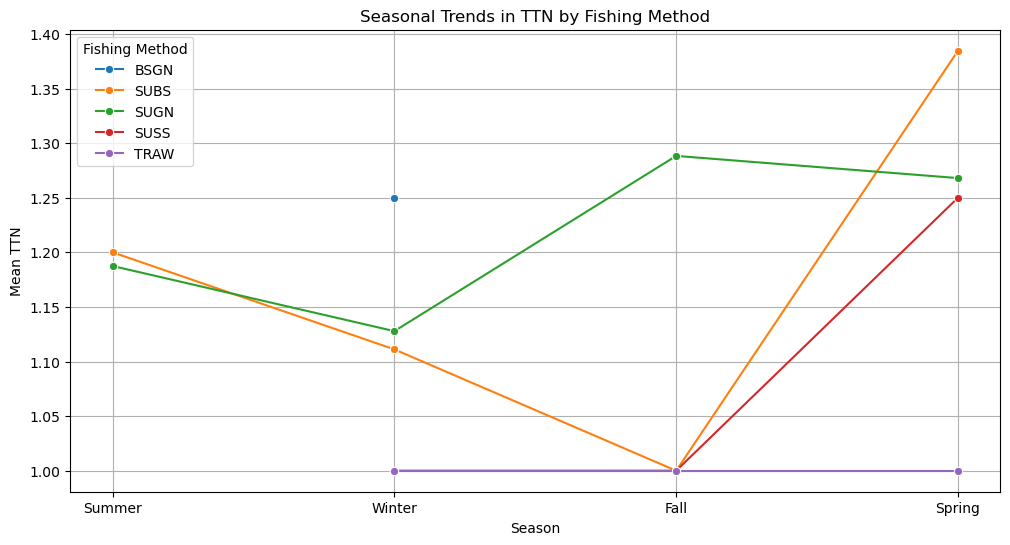

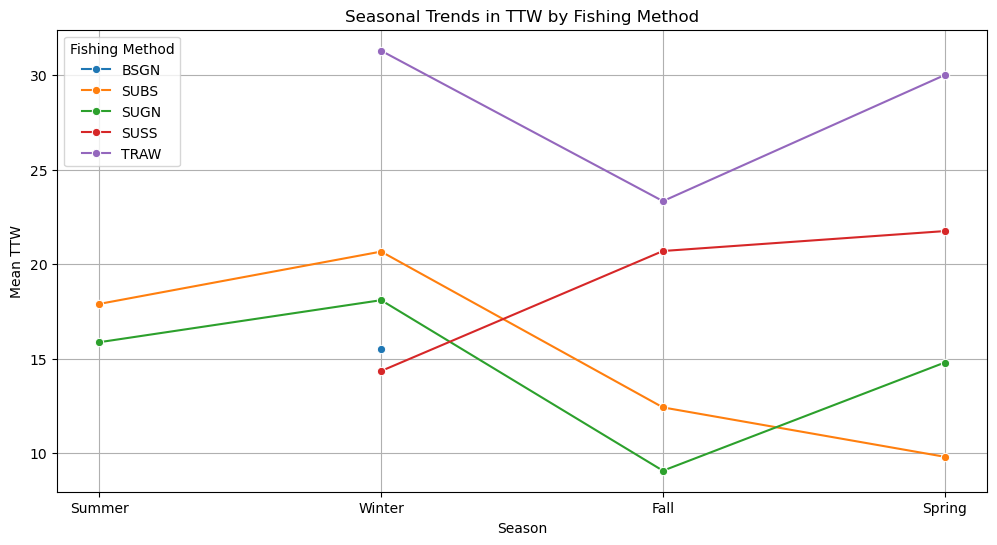

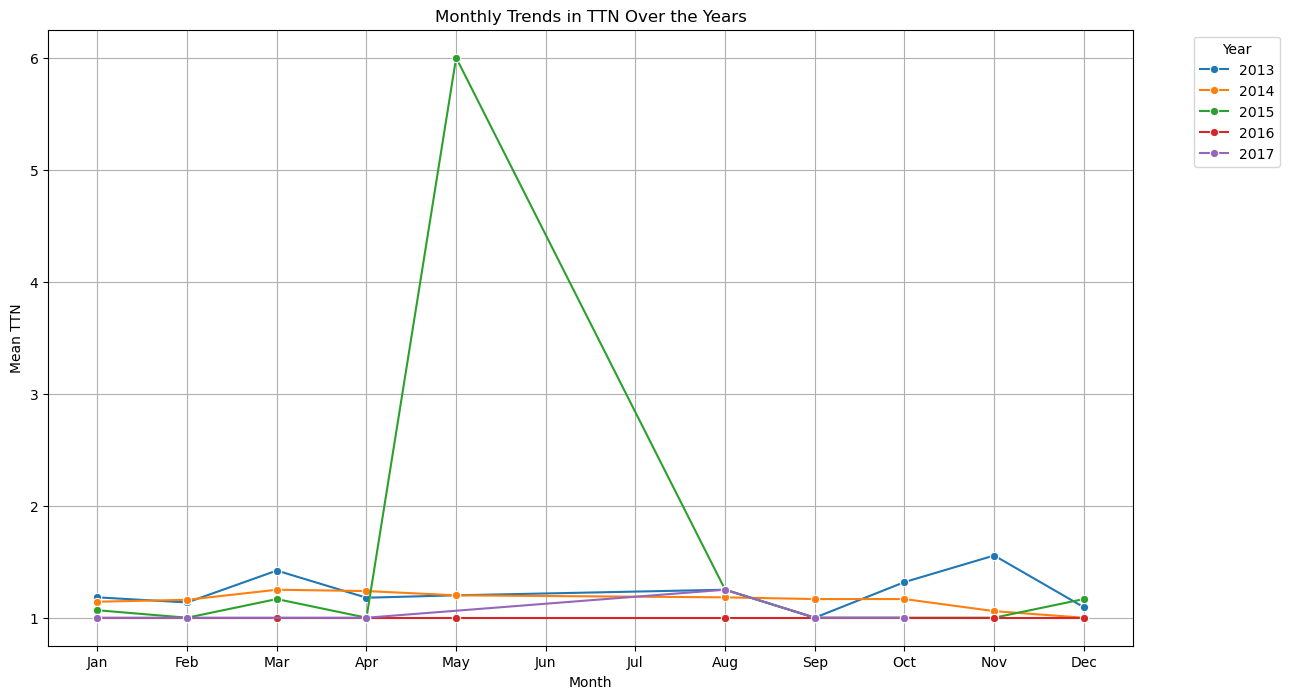

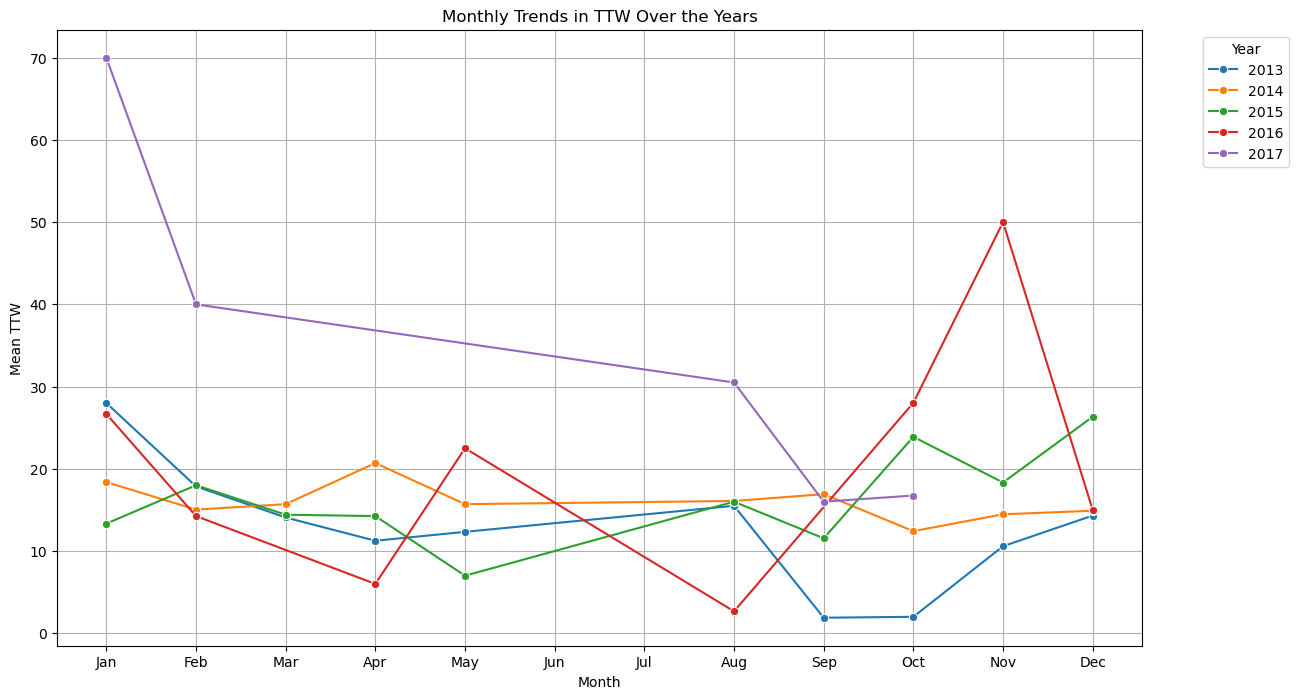

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Convert non-numeric values to NaN
df['TTN'] = pd.to_numeric(df['TTN'], errors='coerce')
df['TTW'] = pd.to_numeric(df['TTW'], errors='coerce')

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Filter out rows where 'Date' is NaT
df_cleaned = df.dropna(subset=['Date'])

# Add Month and Year columns
df_cleaned['Month'] = df_cleaned['Date'].dt.month
df_cleaned['Year'] = df_cleaned['Date'].dt.year

# Define fishing seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df_cleaned['Season'] = df_cleaned['Month'].apply(get_season)

# Seasonal trend analysis by fishing method
seasonal_trends_method = df_cleaned.groupby(['Fishing_Method', 'Season'])[['TTN', 'TTW']].mean().reset_index()

print("Seasonal Trends by Fishing Method:")
print(seasonal_trends_method)

# Plot seasonal trends by fishing method
plt.figure(figsize=(12, 6))
sns.lineplot(data=seasonal_trends_method, x='Season', y='TTN', hue='Fishing_Method', marker='o')
plt.title('Seasonal Trends in TTN by Fishing Method')
plt.xlabel('Season')
plt.ylabel('Mean TTN')
plt.grid(True)
plt.legend(title='Fishing Method')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=seasonal_trends_method, x='Season', y='TTW', hue='Fishing_Method', marker='o')
plt.title('Seasonal Trends in TTW by Fishing Method')
plt.xlabel('Season')
plt.ylabel('Mean TTW')
plt.grid(True)
plt.legend(title='Fishing Method')
plt.show()

# Monthly trend analysis over the years
monthly_trends_years_TTN = df_cleaned.groupby(['Year', 'Month'])['TTN'].mean().reset_index()
monthly_trends_years_TTW = df_cleaned.groupby(['Year', 'Month'])['TTW'].mean().reset_index()

# Plot monthly trends over the years for TTN
plt.figure(figsize=(14, 8))
sns.lineplot(data=monthly_trends_years_TTN, x='Month', y='TTN', hue='Year', palette='tab10', marker='o')
plt.title('Monthly Trends in TTN Over the Years')
plt.xlabel('Month')
plt.ylabel('Mean TTN')
plt.xticks(ticks=np.arange(1, 13, 1), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Plot monthly trends over the years for TTW
plt.figure(figsize=(14, 8))
sns.lineplot(data=monthly_trends_years_TTW, x='Month', y='TTW', hue='Year', palette='tab10', marker='o')
plt.title('Monthly Trends in TTW Over the Years')
plt.xlabel('Month')
plt.ylabel('Mean TTW')
plt.xticks(ticks=np.arange(1, 13, 1), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Summary Statistics by Observer:
             count      mean       std  min  25%  50%  75%  max
Observer                                                       
Iqrar        109.0  1.073394  0.503808  1.0  1.0  1.0  1.0  6.0
Ismail       101.0  1.287129  0.653248  1.0  1.0  1.0  1.0  4.0
Nisar          8.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
Shah Zameen  235.0  1.238298  0.509127  1.0  1.0  1.0  1.0  4.0
Syed Zaman    72.0  1.138889  0.348257  1.0  1.0  1.0  1.0  2.0


C:\Users\Shoaib\AppData\Local\Temp\ipykernel_25740\3846441565.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = df_cleaned.groupby('Observer')['TTN'].describe()


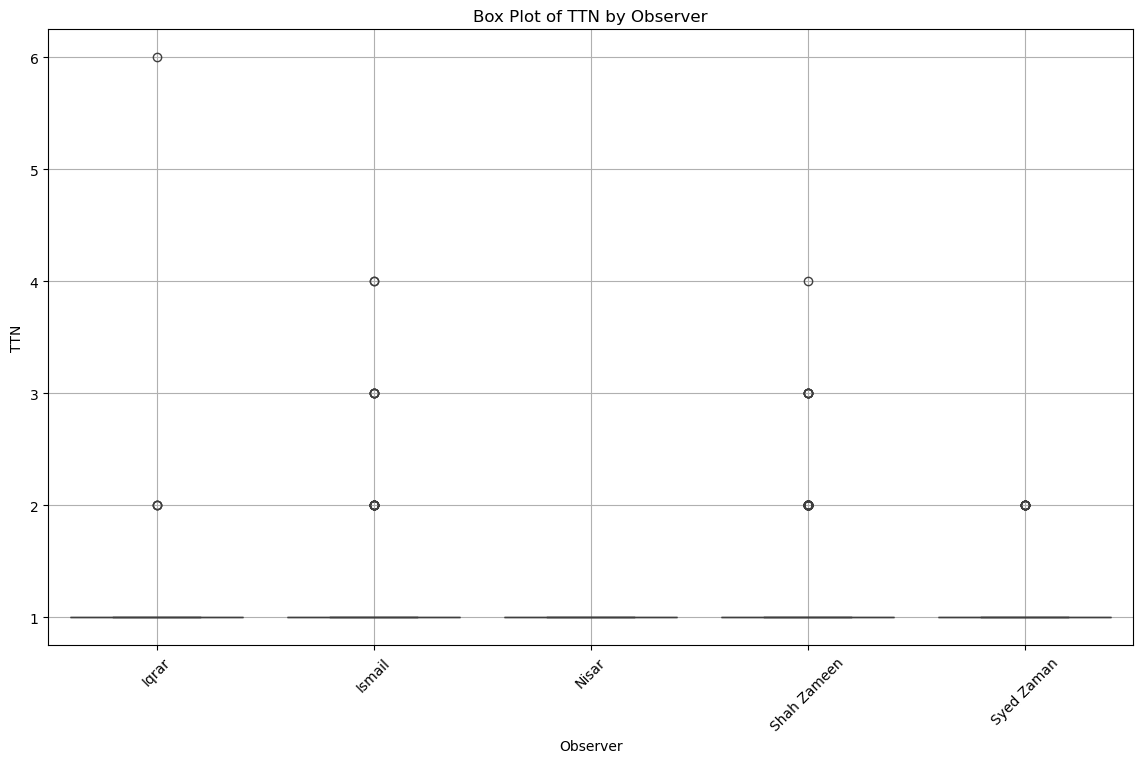

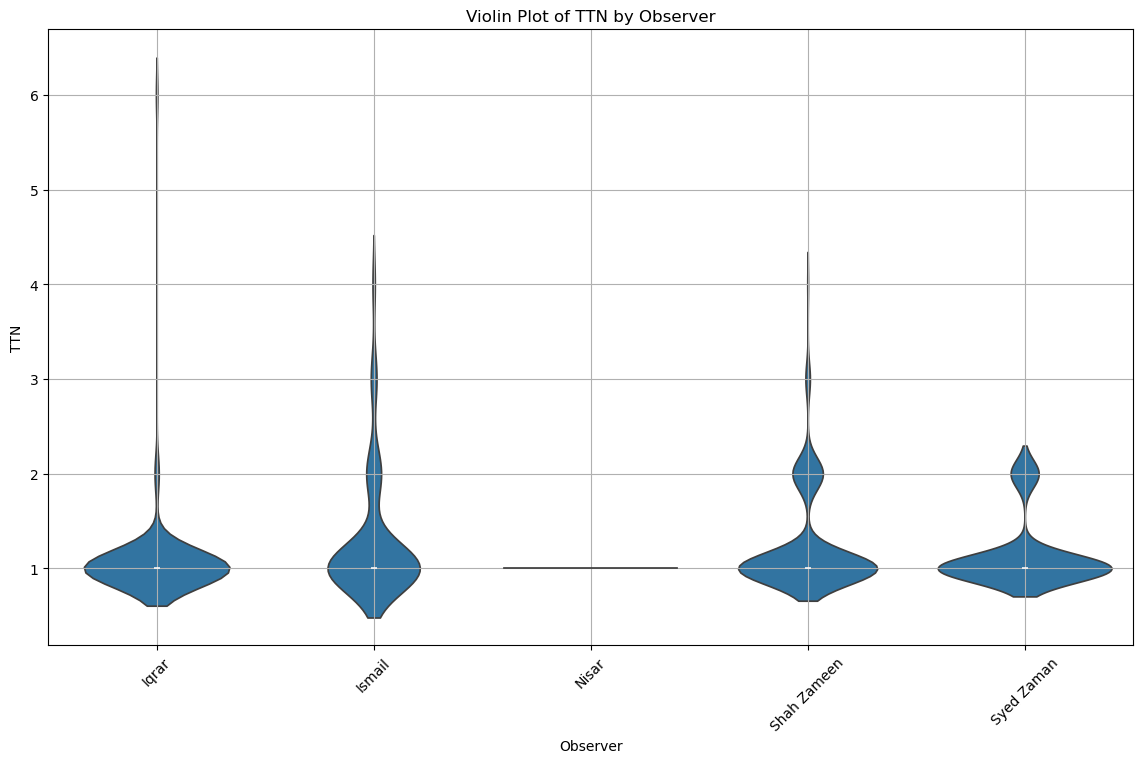

ANOVA Table:
                 sum_sq     df         F    PR(>F)
C(Observer)    3.439839    4.0  3.208977  0.012814
Residual     139.352542  520.0       NaN       NaN
Tukey's HSD results:
     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
   group1      group2   meandiff p-adj   lower  upper  reject
-------------------------------------------------------------
      Iqrar      Ismail   0.2137 0.0243   0.018 0.4094   True
      Iqrar       Nisar  -0.0734 0.9952 -0.5925 0.4457  False
      Iqrar Shah Zameen   0.1649 0.0485  0.0007 0.3291   True
      Iqrar  Syed Zaman   0.0655 0.9203 -0.1497 0.2807  False
     Ismail       Nisar  -0.2871 0.5563 -0.8076 0.2333  False
     Ismail Shah Zameen  -0.0488 0.9327 -0.2174 0.1198  False
     Ismail  Syed Zaman  -0.1482 0.3424 -0.3668 0.0703  False
      Nisar Shah Zameen   0.2383 0.7034 -0.2712 0.7478  False
      Nisar  Syed Zaman   0.1389 0.9519 -0.3892  0.667  False
Shah Zameen  Syed Zaman  -0.0994 0.6114 -0.2903 0.0915  False
-------

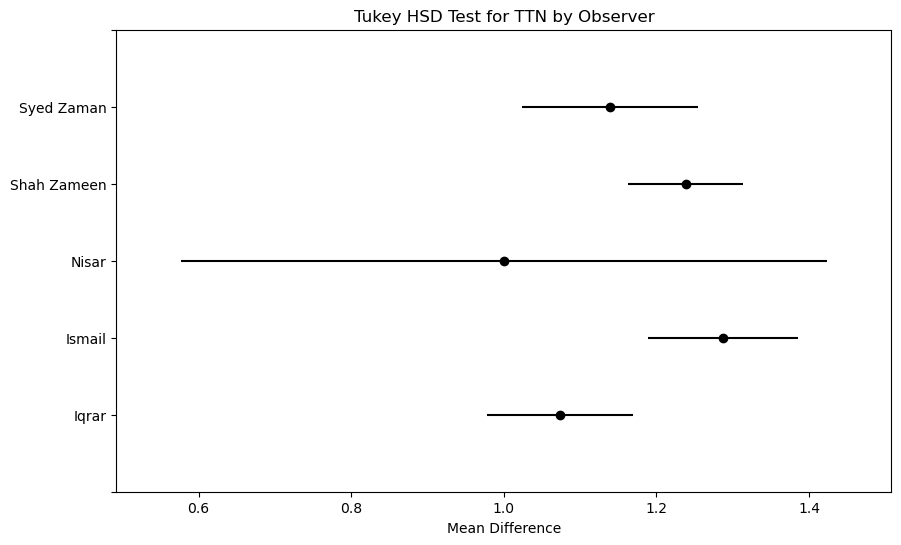


# Summary Report

### Descriptive Statistics
             count      mean       std  min  25%  50%  75%  max
Observer                                                       
Iqrar        109.0  1.073394  0.503808  1.0  1.0  1.0  1.0  6.0
Ismail       101.0  1.287129  0.653248  1.0  1.0  1.0  1.0  4.0
Nisar          8.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
Shah Zameen  235.0  1.238298  0.509127  1.0  1.0  1.0  1.0  4.0
Syed Zaman    72.0  1.138889  0.348257  1.0  1.0  1.0  1.0  2.0

### ANOVA Results
- The ANOVA analysis revealed significant differences in TTN among different observers (p < 0.05).

### Tukey's HSD Results
     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
   group1      group2   meandiff p-adj   lower  upper  reject
-------------------------------------------------------------
      Iqrar      Ismail   0.2137 0.0243   0.018 0.4094   True
      Iqrar       Nisar  -0.0734 0.9952 -0.5925 0.4457  False
      Iqrar Shah Zameen   0.1649 0.0485  0.0007 0.329

C:\Users\Shoaib\AppData\Local\Temp\ipykernel_25740\3846441565.py:75: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  anova_p_value = anova_table["PR(>F)"][0]


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Load the Excel file from the specified path
file_path = r'C:\Users\Shoaib\Desktop\CBOP\CBOB_2012_17_v9.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet2')

# Convert non-numeric values to NaN
df['TTN'] = pd.to_numeric(df['TTN'], errors='coerce')
df['TTW'] = pd.to_numeric(df['TTW'], errors='coerce')

# Convert Observer to a categorical type
df['Observer'] = df['Observer'].astype('category')

# Filter out rows with NaN values in TTN
df_cleaned = df.dropna(subset=['TTN'])

# Descriptive Statistics
summary_stats = df_cleaned.groupby('Observer')['TTN'].describe()
print("Summary Statistics by Observer:")
print(summary_stats)

# Visualization
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_cleaned, x='Observer', y='TTN')
plt.title('Box Plot of TTN by Observer')
plt.xlabel('Observer')
plt.ylabel('TTN')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 8))
sns.violinplot(data=df_cleaned, x='Observer', y='TTN')
plt.title('Violin Plot of TTN by Observer')
plt.xlabel('Observer')
plt.ylabel('TTN')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# ANOVA
anova_model = ols('TTN ~ C(Observer)', data=df_cleaned).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
print("ANOVA Table:")
print(anova_table)

# Post Hoc Analysis (Tukey's HSD)
tukey = pairwise_tukeyhsd(endog=df_cleaned['TTN'], groups=df_cleaned['Observer'], alpha=0.05)
print("Tukey's HSD results:")
print(tukey)

# Plot Tukey's HSD results
tukey.plot_simultaneous()
plt.title('Tukey HSD Test for TTN by Observer')
plt.xlabel('Mean Difference')
plt.show()

# Summary Report
print("\n# Summary Report")

## Analysis of TTN

### Descriptive Statistics
print("\n### Descriptive Statistics")
print(summary_stats)

### ANOVA Results
anova_p_value = anova_table["PR(>F)"][0]
print("\n### ANOVA Results")
if (anova_p_value < 0.05):
    print(f"- The ANOVA analysis revealed significant differences in TTN among different observers (p < 0.05).")
else:
    print(f"- The ANOVA analysis did not reveal significant differences in TTN among different observers (p > 0.05).")

### Tukey's HSD Results
print("\n### Tukey's HSD Results")
tukey_summary = tukey.summary()
print(tukey_summary)
significant_pairs = tukey_summary.data[1:]
significant_pairs = [pair for pair in significant_pairs if pair[-1] < 0.05]

if significant_pairs:
    print("- The following pairs of observers showed significant differences in TTN (p < 0.05):")
    for pair in significant_pairs:
        print(f"  - {pair[0]} and {pair[1]} (p = {pair[-1]:.4f})")
else:
    print("- No significant differences were found between observers (p > 0.05).")


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Load the Excel file from the specified path
file_path = r'C:\Users\Shoaib\Desktop\CBOP\CBOB_2012_17_v9.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet2')

# Convert non-numeric values to NaN
df['TTN'] = pd.to_numeric(df['TTN'], errors='coerce')
df['TTW'] = pd.to_numeric(df['TTW'], errors='coerce')

# Convert Observer to a categorical type
df['Observer'] = df['Observer'].astype('category')

# Assuming 'Lat' and 'Long' are latitude and longitude columns, convert them to numeric
df['Lat'] = pd.to_numeric(df['Lat'], errors='coerce')
df['Long'] = pd.to_numeric(df['Long'], errors='coerce')

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Filter out rows with NaN values in TTN, Lat, Long, and Date
df_cleaned = df.dropna(subset=['TTN', 'Lat', 'Long', 'Date']).copy()

# Create a new column for season
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Extract month from Date and create Season column
df_cleaned.loc[:, 'Month'] = df_cleaned['Date'].dt.month
df_cleaned.loc[:, 'Season'] = df_cleaned['Month'].apply(get_season)
df_cleaned['Season'] = df_cleaned['Season'].astype('category')

# Verify that the Season column is created successfully
if 'Season' not in df_cleaned.columns:
    raise KeyError("Failed to create 'Season' column in the dataset")

# Multiple Linear Regression for TTN
formula_ttn = 'TTN ~ C(Observer) + Lat + Long + C(Season)'
model_ttn = ols(formula_ttn, data=df_cleaned).fit()
print(model_ttn.summary())

# Filter out rows with NaN values in TTW, Lat, Long, and Date
df_cleaned_ttw = df.dropna(subset=['TTW', 'Lat', 'Long', 'Date']).copy()

# Extract month from Date and create Season column for TTW
df_cleaned_ttw.loc[:, 'Month'] = df_cleaned_ttw['Date'].dt.month
df_cleaned_ttw.loc[:, 'Season'] = df_cleaned_ttw['Month'].apply(get_season)
df_cleaned_ttw['Season'] = df_cleaned_ttw['Season'].astype('category')

# Verify that the Season column is created successfully for TTW
if 'Season' not in df_cleaned_ttw.columns:
    raise KeyError("Failed to create 'Season' column in the dataset for TTW")

# Multiple Linear Regression for TTW
formula_ttw = 'TTW ~ C(Observer) + Lat + Long + C(Season)'
model_ttw = ols(formula_ttw, data=df_cleaned_ttw).fit()
print(model_ttw.summary())


                            OLS Regression Results                            
Dep. Variable:                    TTN   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     3.026
Date:                Tue, 12 Nov 2024   Prob (F-statistic):            0.00156
Time:                        20:41:01   Log-Likelihood:                -389.64
No. Observations:                 525   AIC:                             799.3
Df Residuals:                     515   BIC:                             841.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [10]:
# Print the summary of the TTN model
print("Summary of DTN Multiple Linear Regression Model:")
print(model_ttn.summary())

# Print the summary of the TTW model
print("Summary of DTW Multiple Linear Regression Model:")
print(model_ttw.summary())

Summary of DTN Multiple Linear Regression Model:
                            OLS Regression Results                            
Dep. Variable:                    TTN   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     3.026
Date:                Tue, 12 Nov 2024   Prob (F-statistic):            0.00156
Time:                        20:41:01   Log-Likelihood:                -389.64
No. Observations:                 525   AIC:                             799.3
Df Residuals:                     515   BIC:                             841.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

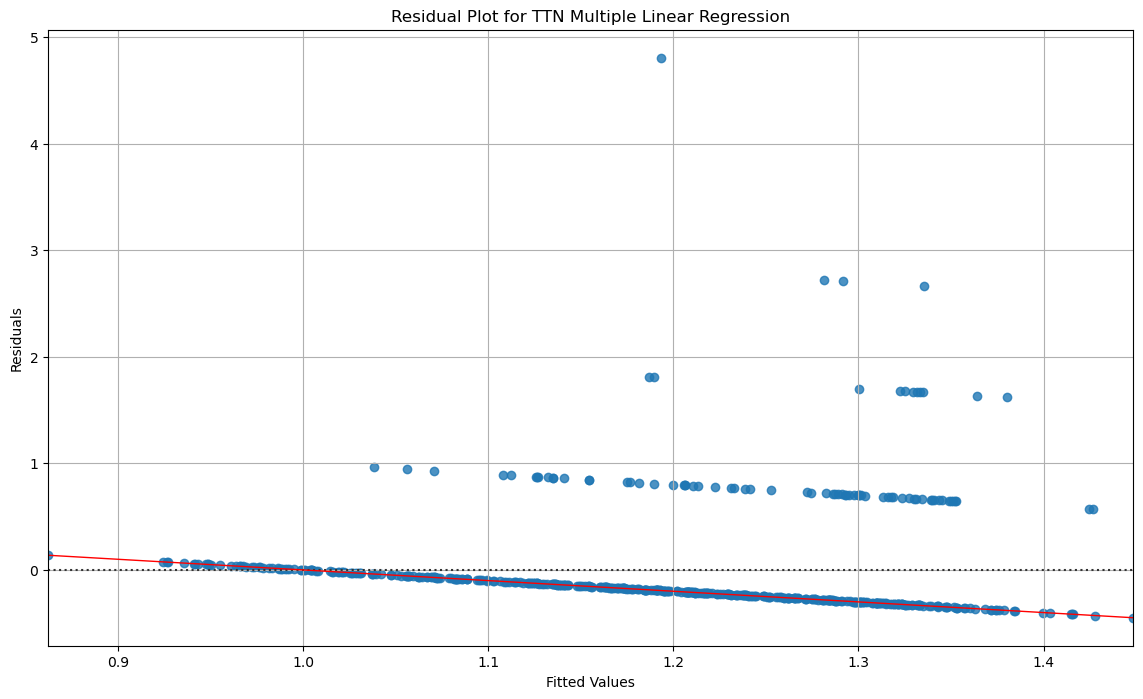

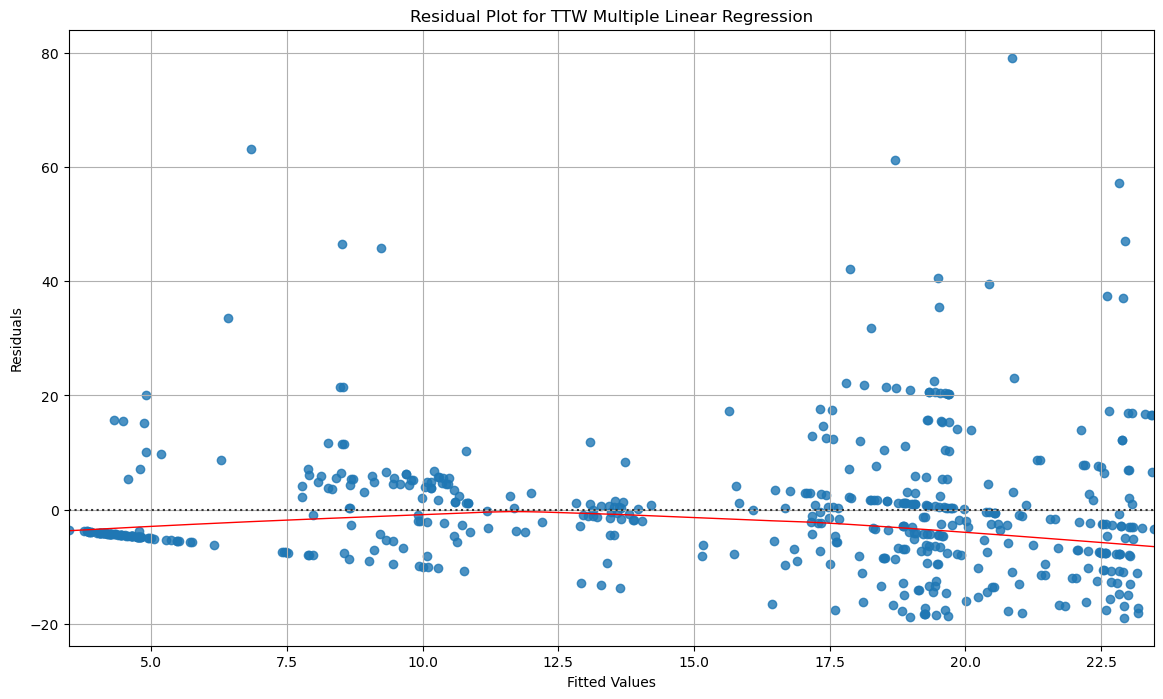

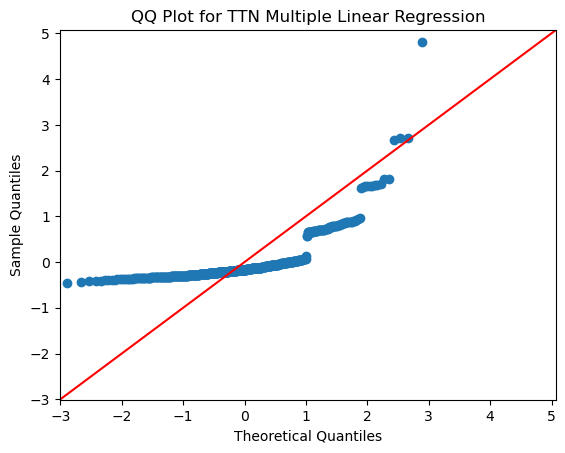

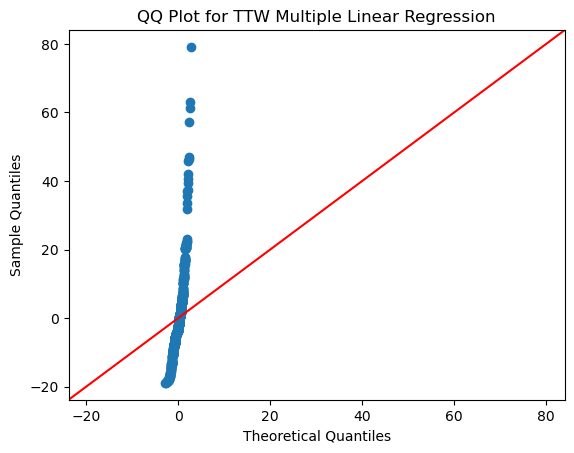

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Residual plots for TTN
plt.figure(figsize=(14, 8))
sns.residplot(x=model_ttn.fittedvalues, y=model_ttn.resid, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Residual Plot for TTN Multiple Linear Regression')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Residual plots for TTW
plt.figure(figsize=(14, 8))
sns.residplot(x=model_ttw.fittedvalues, y=model_ttw.resid, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Residual Plot for TTW Multiple Linear Regression')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# QQ plots for TTN
sm.qqplot(model_ttn.resid, line='45')
plt.title('QQ Plot for TTN Multiple Linear Regression')
plt.show()

# QQ plots for TTW
sm.qqplot(model_ttw.resid, line='45')
plt.title('QQ Plot for TTW Multiple Linear Regression')
plt.show()


Summary Statistics by Fishing Method:
                count      mean       std  min  25%  50%   75%  max
Fishing_Method                                                     
BSGN              4.0  1.250000  0.500000  1.0  1.0  1.0  1.25  2.0
SUBS             51.0  1.156863  0.731370  1.0  1.0  1.0  1.00  6.0
SUGN            413.0  1.225182  0.521522  1.0  1.0  1.0  1.00  4.0
SUSS             37.0  1.027027  0.164399  1.0  1.0  1.0  1.00  2.0
TRAW             20.0  1.000000  0.000000  1.0  1.0  1.0  1.00  1.0


C:\Users\Shoaib\AppData\Local\Temp\ipykernel_25740\1948788994.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = df_cleaned.groupby('Fishing_Method')['TTN'].describe()


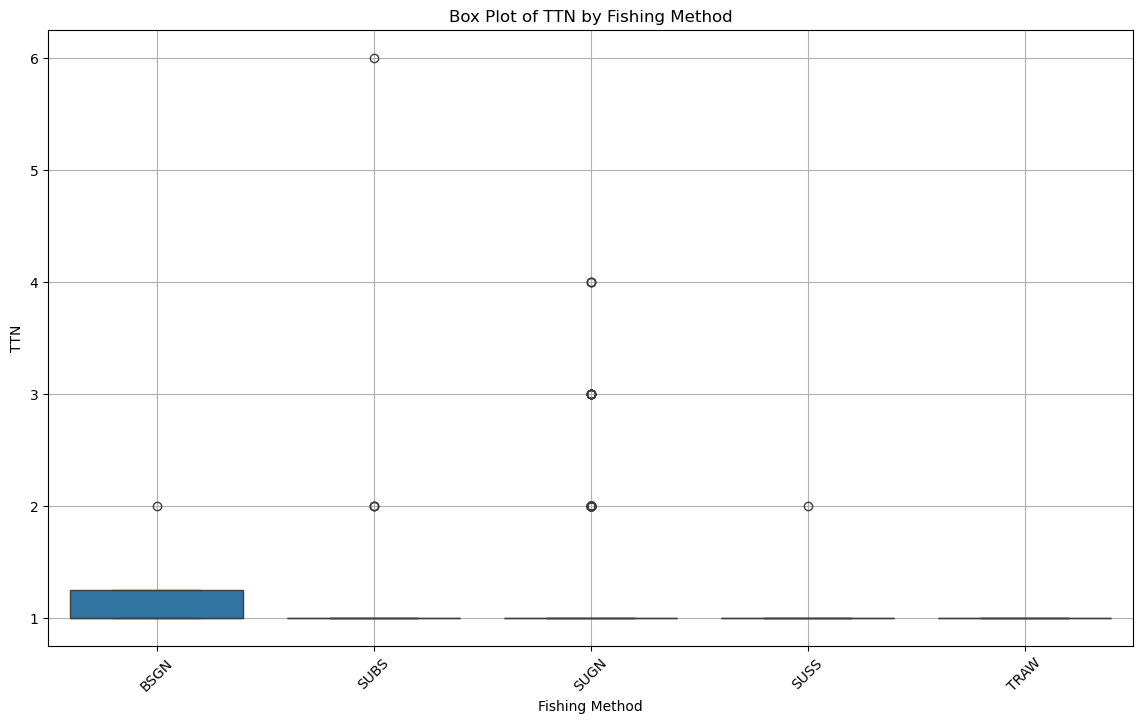

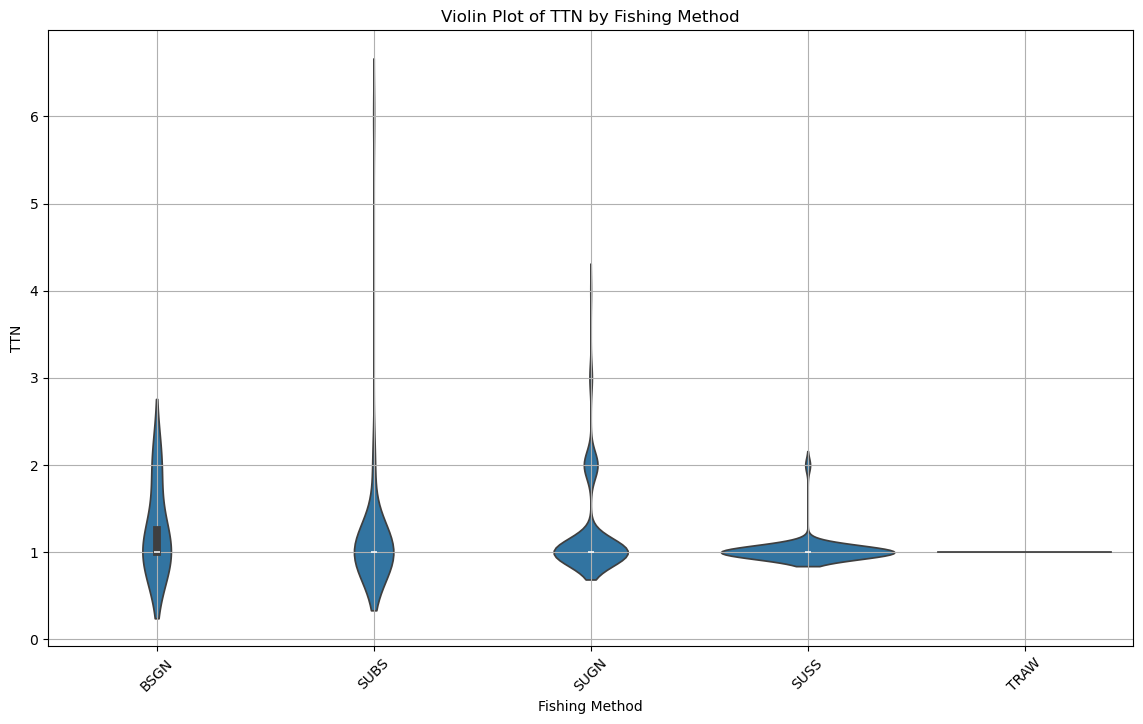

ANOVA Table:
                       sum_sq     df         F    PR(>F)
C(Fishing_Method)    2.266199    4.0  2.096448  0.080054
Residual           140.526182  520.0       NaN       NaN
Tukey's HSD results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  BSGN   SUBS  -0.0931  0.997  -0.832 0.6457  False
  BSGN   SUGN  -0.0248    1.0 -0.7398 0.6901  False
  BSGN   SUSS   -0.223  0.926  -0.972  0.526  False
  BSGN   TRAW    -0.25 0.9049 -1.0294 0.5294  False
  SUBS   SUGN   0.0683 0.9022 -0.1429 0.2795  False
  SUBS   SUSS  -0.1298 0.7761 -0.4371 0.1775  False
  SUBS   TRAW  -0.1569 0.7831 -0.5323 0.2186  False
  SUGN   SUSS  -0.1982 0.1734 -0.4424  0.046  False
  SUGN   TRAW  -0.2252 0.3229  -0.551 0.1006  False
  SUSS   TRAW   -0.027 0.9997  -0.422 0.3679  False
---------------------------------------------------


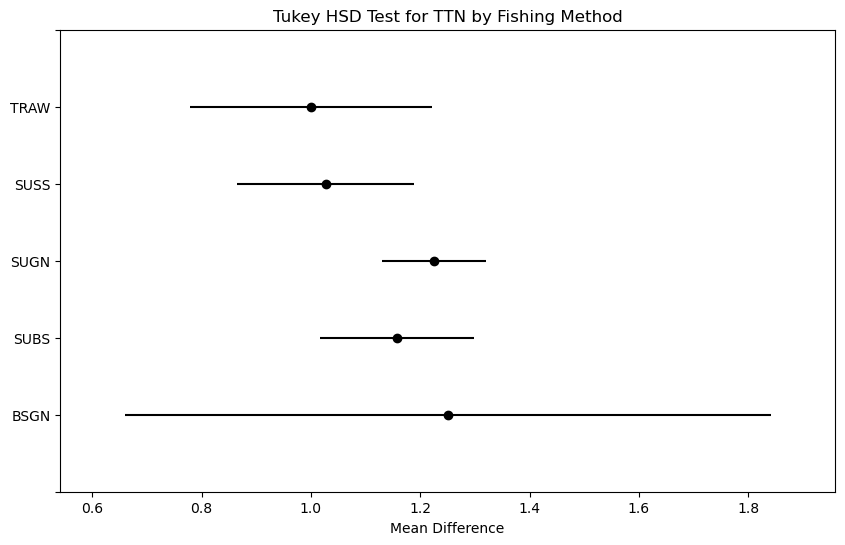


# Summary Report

### Descriptive Statistics
                count      mean       std  min  25%  50%   75%  max
Fishing_Method                                                     
BSGN              4.0  1.250000  0.500000  1.0  1.0  1.0  1.25  2.0
SUBS             51.0  1.156863  0.731370  1.0  1.0  1.0  1.00  6.0
SUGN            413.0  1.225182  0.521522  1.0  1.0  1.0  1.00  4.0
SUSS             37.0  1.027027  0.164399  1.0  1.0  1.0  1.00  2.0
TRAW             20.0  1.000000  0.000000  1.0  1.0  1.0  1.00  1.0

### ANOVA Results
- The ANOVA analysis did not reveal significant differences in TTN among different fishing methods (p > 0.05).

### Tukey's HSD Results
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  BSGN   SUBS  -0.0931  0.997  -0.832 0.6457  False
  BSGN   SUGN  -0.0248    1.0 -0.7398 0.6901  False
  BSGN   SUSS   -0.223  0.926  -0.972  0.526  False
  BSGN   TR

C:\Users\Shoaib\AppData\Local\Temp\ipykernel_25740\1948788994.py:75: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  anova_p_value = anova_table["PR(>F)"][0]


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Load the Excel file from the specified path
file_path = r'C:\Users\Shoaib\Desktop\CBOP\CBOB_2012_17_v9.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet2')

# Convert non-numeric values to NaN
df['TTN'] = pd.to_numeric(df['TTN'], errors='coerce')
df['TTW'] = pd.to_numeric(df['TTW'], errors='coerce')

# Convert Fishing Method to a categorical type
df['Fishing_Method'] = df['Fishing_Method'].astype('category')

# Filter out rows with NaN values in TTN
df_cleaned = df.dropna(subset=['TTN'])

# Descriptive Statistics
summary_stats = df_cleaned.groupby('Fishing_Method')['TTN'].describe()
print("Summary Statistics by Fishing Method:")
print(summary_stats)

# Visualization
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_cleaned, x='Fishing_Method', y='TTN')
plt.title('Box Plot of TTN by Fishing Method')
plt.xlabel('Fishing Method')
plt.ylabel('TTN')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 8))
sns.violinplot(data=df_cleaned, x='Fishing_Method', y='TTN')
plt.title('Violin Plot of TTN by Fishing Method')
plt.xlabel('Fishing Method')
plt.ylabel('TTN')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# ANOVA
anova_model = ols('TTN ~ C(Fishing_Method)', data=df_cleaned).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
print("ANOVA Table:")
print(anova_table)

# Post Hoc Analysis (Tukey's HSD)
tukey = pairwise_tukeyhsd(endog=df_cleaned['TTN'], groups=df_cleaned['Fishing_Method'], alpha=0.05)
print("Tukey's HSD results:")
print(tukey)

# Plot Tukey's HSD results
tukey.plot_simultaneous()
plt.title('Tukey HSD Test for TTN by Fishing Method')
plt.xlabel('Mean Difference')
plt.show()

# Summary Report
print("\n# Summary Report")

## Analysis of TTN

### Descriptive Statistics
print("\n### Descriptive Statistics")
print(summary_stats)

### ANOVA Results
anova_p_value = anova_table["PR(>F)"][0]
print("\n### ANOVA Results")
if anova_p_value < 0.05:
    print(f"- The ANOVA analysis revealed significant differences in TTN among different fishing methods (p < 0.05).")
else:
    print(f"- The ANOVA analysis did not reveal significant differences in TTN among different fishing methods (p > 0.05).")

### Tukey's HSD Results
print("\n### Tukey's HSD Results")
tukey_summary = tukey.summary()
print(tukey_summary)
significant_pairs = tukey_summary.data[1:]
significant_pairs = [pair for pair in significant_pairs if pair[-1] < 0.05]

if significant_pairs:
    print("- The following pairs of fishing methods showed significant differences in TTN (p < 0.05):")
    for pair in significant_pairs:
        print(f"  - {pair[0]} and {pair[1]} (p = {pair[-1]:.4f})")
else:
    print("- No significant differences were found between fishing methods (p > 0.05).")


Summary Statistics by Fishing Method:
                count       mean        std    min    25%   50%   75%    max
Fishing_Method                                                              
BSGN              4.0  15.500000   7.724420   8.00   9.50  15.0  21.0   24.0
SUBS             44.0  14.704545  14.436033   0.00   7.75  12.0  17.0   70.0
SUGN            411.0  14.364964  13.297282   0.00   4.50  14.0  20.0  100.0
SUSS             37.0  17.895946  14.391570   0.15   9.00  14.0  20.0   60.0
TRAW             20.0  26.450000  11.695591  10.00  20.00  20.0  40.0   50.0


C:\Users\Shoaib\AppData\Local\Temp\ipykernel_25740\1756258652.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = df_cleaned.groupby('Fishing_Method')['TTW'].describe()


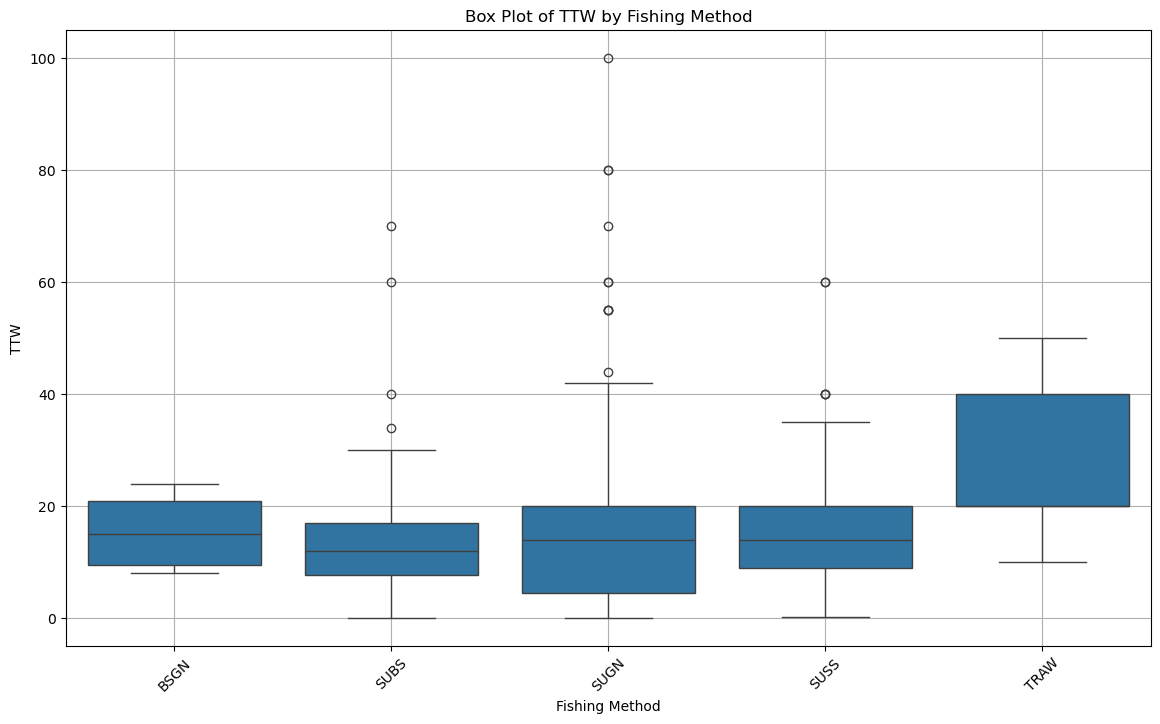

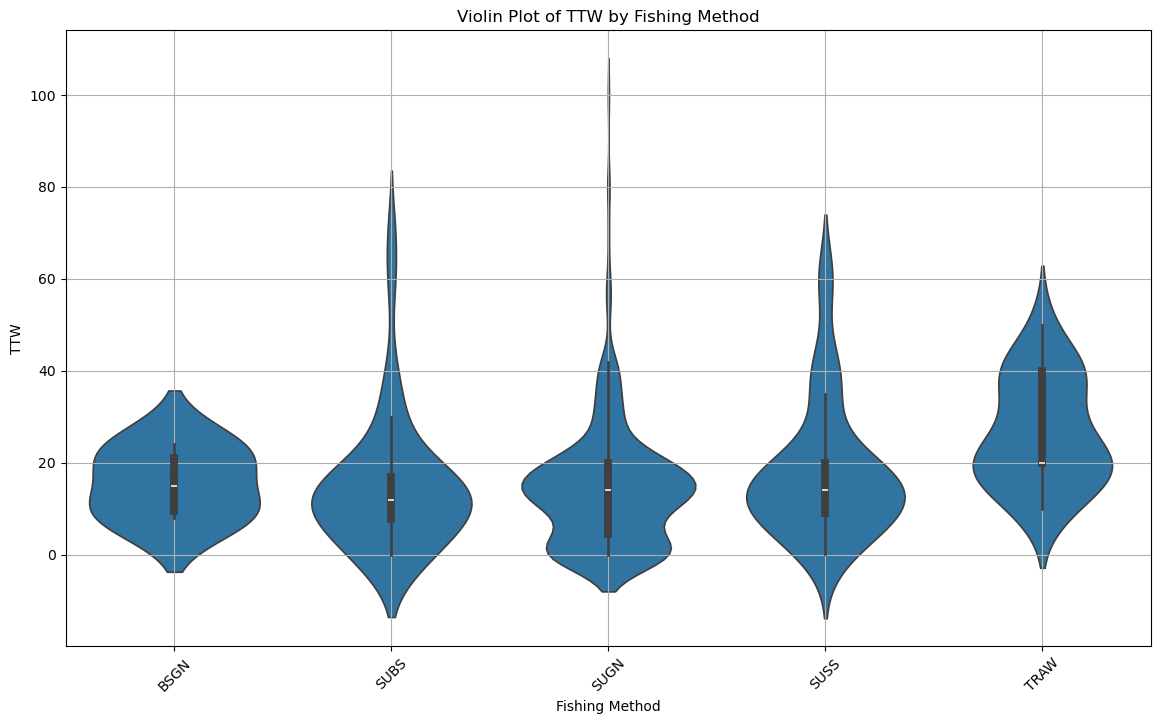

ANOVA Table:
                         sum_sq     df         F    PR(>F)
C(Fishing_Method)   3094.960805    4.0  4.312125  0.001936
Residual           91690.586457  511.0       NaN       NaN
Tukey's HSD results:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
  BSGN   SUBS  -0.7955    1.0 -19.9458 18.3549  False
  BSGN   SUGN   -1.135 0.9998 -19.5591 17.2891  False
  BSGN   SUSS   2.3959 0.9971 -16.9048 21.6967  False
  BSGN   TRAW    10.95 0.5679  -9.1351 31.0351  False
  SUBS   SUGN  -0.3396 0.9999  -6.1562   5.477  False
  SUBS   SUSS   3.1914 0.8228  -4.9881 11.3709  False
  SUBS   TRAW  11.7455 0.0107   1.8562 21.6347   True
  SUGN   SUSS    3.531 0.5396  -2.7631   9.825  False
  SUGN   TRAW   12.085 0.0009   3.6882 20.4819   True
  SUSS   TRAW   8.5541 0.1462  -1.6233 18.7314  False
-----------------------------------------------------


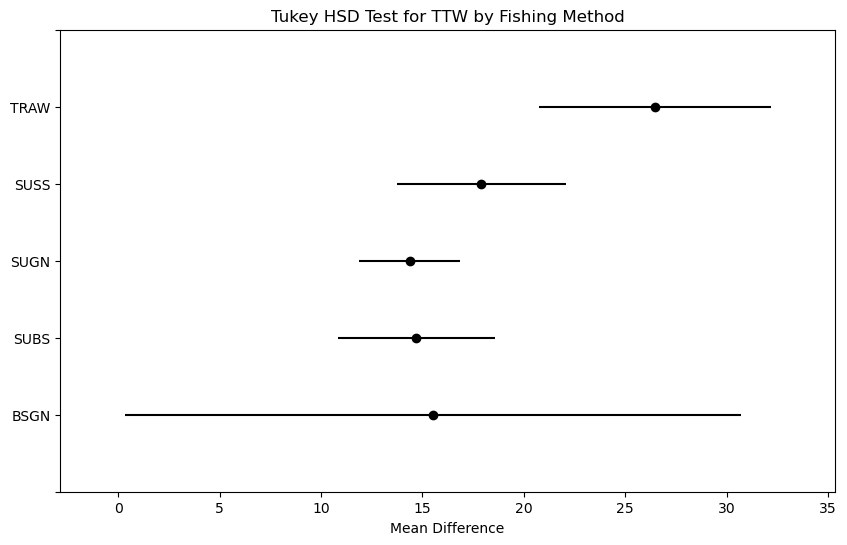


# Summary Report

### Descriptive Statistics
                count       mean        std    min    25%   50%   75%    max
Fishing_Method                                                              
BSGN              4.0  15.500000   7.724420   8.00   9.50  15.0  21.0   24.0
SUBS             44.0  14.704545  14.436033   0.00   7.75  12.0  17.0   70.0
SUGN            411.0  14.364964  13.297282   0.00   4.50  14.0  20.0  100.0
SUSS             37.0  17.895946  14.391570   0.15   9.00  14.0  20.0   60.0
TRAW             20.0  26.450000  11.695591  10.00  20.00  20.0  40.0   50.0

### ANOVA Results
- The ANOVA analysis revealed significant differences in TTW among different fishing methods (p < 0.05).

### Tukey's HSD Results
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
  BSGN   SUBS  -0.7955    1.0 -19.9458 18.3549  False
  BSGN   SUGN   -1.135 0.9998 -19.5591 17.2891  Fa

C:\Users\Shoaib\AppData\Local\Temp\ipykernel_25740\1756258652.py:75: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  anova_p_value = anova_table["PR(>F)"][0]


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Load the Excel file from the specified path
file_path = r'C:\Users\Shoaib\Desktop\CBOP\CBOB_2012_17_v9.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet2')

# Convert non-numeric values to NaN
df['TTN'] = pd.to_numeric(df['TTN'], errors='coerce')
df['TTW'] = pd.to_numeric(df['TTW'], errors='coerce')

# Convert Fishing Method to a categorical type
df['Fishing_Method'] = df['Fishing_Method'].astype('category')

# Filter out rows with NaN values in TTW
df_cleaned = df.dropna(subset=['TTW'])

# Descriptive Statistics
summary_stats = df_cleaned.groupby('Fishing_Method')['TTW'].describe()
print("Summary Statistics by Fishing Method:")
print(summary_stats)

# Visualization
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_cleaned, x='Fishing_Method', y='TTW')
plt.title('Box Plot of TTW by Fishing Method')
plt.xlabel('Fishing Method')
plt.ylabel('TTW')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 8))
sns.violinplot(data=df_cleaned, x='Fishing_Method', y='TTW')
plt.title('Violin Plot of TTW by Fishing Method')
plt.xlabel('Fishing Method')
plt.ylabel('TTW')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# ANOVA
anova_model = ols('TTW ~ C(Fishing_Method)', data=df_cleaned).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
print("ANOVA Table:")
print(anova_table)

# Post Hoc Analysis (Tukey's HSD)
tukey = pairwise_tukeyhsd(endog=df_cleaned['TTW'], groups=df_cleaned['Fishing_Method'], alpha=0.05)
print("Tukey's HSD results:")
print(tukey)

# Plot Tukey's HSD results
tukey.plot_simultaneous()
plt.title('Tukey HSD Test for TTW by Fishing Method')
plt.xlabel('Mean Difference')
plt.show()

# Summary Report
print("\n# Summary Report")

## Analysis of TTW

### Descriptive Statistics
print("\n### Descriptive Statistics")
print(summary_stats)

### ANOVA Results
anova_p_value = anova_table["PR(>F)"][0]
print("\n### ANOVA Results")
if anova_p_value < 0.05:
    print(f"- The ANOVA analysis revealed significant differences in TTW among different fishing methods (p < 0.05).")
else:
    print(f"- The ANOVA analysis did not reveal significant differences in TTW among different fishing methods (p > 0.05).")

### Tukey's HSD Results
print("\n### Tukey's HSD Results")
tukey_summary = tukey.summary()
print(tukey_summary)
significant_pairs = tukey_summary.data[1:]
significant_pairs = [pair for pair in significant_pairs if pair[-1] < 0.05]

if significant_pairs:
    print("- The following pairs of fishing methods showed significant differences in TTW (p < 0.05):")
    for pair in significant_pairs:
        print(f"  - {pair[0]} and {pair[1]} (p = {pair[-1]:.4f})")
else:
    print("- No significant differences were found between fishing methods (p > 0.05).")


Further Analysis - Exploring Additional Factors

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Load the Excel file from the specified path
file_path = r'C:\Users\Shoaib\Desktop\CBOP\CBOB_2012_17_v9.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet2')

# Convert non-numeric values to NaN
df['TTN'] = pd.to_numeric(df['TTN'], errors='coerce')
df['TTW'] = pd.to_numeric(df['TTW'], errors='coerce')

# Convert Fishing Method to a categorical type
df['Fishing_Method'] = df['Fishing_Method'].astype('category')

# Assuming 'Lat' and 'Long' are latitude and longitude columns, convert them to numeric
df['Lat'] = pd.to_numeric(df['Lat'], errors='coerce')
df['Long'] = pd.to_numeric(df['Long'], errors='coerce')

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Filter out rows with NaN values in TTN, Lat, Long, and Date
df_cleaned = df.dropna(subset=['TTN', 'Lat', 'Long', 'Date'])

# Create a new column for season
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Extract month from Date and create Season column
df_cleaned['Month'] = df_cleaned['Date'].dt.month
df_cleaned['Season'] = df_cleaned['Month'].apply(get_season)
df_cleaned['Season'] = df_cleaned['Season'].astype('category')

# Verify that the Season column is created successfully
if 'Season' not in df_cleaned.columns:
    raise KeyError("Failed to create 'Season' column in the dataset")

# Multiple Linear Regression for TTN
formula_ttn = 'TTN ~ C(Fishing_Method) + Lat + Long + C(Season)'
model_ttn = ols(formula_ttn, data=df_cleaned).fit()
print(model_ttn.summary())

# Filter out rows with NaN values in TTW, Lat, Long, and Date
df_cleaned_ttw = df.dropna(subset=['TTW', 'Lat', 'Long', 'Date'])

# Extract month from Date and create Season column for TTW
df_cleaned_ttw['Month'] = df_cleaned_ttw['Date'].dt.month
df_cleaned_ttw['Season'] = df_cleaned_ttw['Month'].apply(get_season)
df_cleaned_ttw['Season'] = df_cleaned_ttw['Season'].astype('category')

# Verify that the Season column is created successfully for TTW
if 'Season' not in df_cleaned_ttw.columns:
    raise KeyError("Failed to create 'Season' column in the dataset for TTW")

# Multiple Linear Regression for TTW
formula_ttw = 'TTW ~ C(Fishing_Method) + Lat + Long + C(Season)'
model_ttw = ols(formula_ttw, data=df_cleaned_ttw).fit()
print(model_ttw.summary())


                            OLS Regression Results                            
Dep. Variable:                    TTN   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     2.099
Date:                Tue, 12 Nov 2024   Prob (F-statistic):             0.0280
Time:                        20:41:07   Log-Likelihood:                -393.71
No. Observations:                 525   AIC:                             807.4
Df Residuals:                     515   BIC:                             850.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

C:\Users\Shoaib\AppData\Local\Temp\ipykernel_25740\886128868.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Month'] = df_cleaned['Date'].dt.month
C:\Users\Shoaib\AppData\Local\Temp\ipykernel_25740\886128868.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Season'] = df_cleaned['Month'].apply(get_season)
C:\Users\Shoaib\AppData\Local\Temp\ipykernel_25740\886128868.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [15]:
# Print the summary of the TTN model
print("Summary of TTN Multiple Linear Regression Model:")
print(model_ttn.summary())

# Print the summary of the TTW model
print("Summary of TTW Multiple Linear Regression Model:")
print(model_ttw.summary())

Summary of TTN Multiple Linear Regression Model:
                            OLS Regression Results                            
Dep. Variable:                    TTN   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     2.099
Date:                Tue, 12 Nov 2024   Prob (F-statistic):             0.0280
Time:                        20:41:07   Log-Likelihood:                -393.71
No. Observations:                 525   AIC:                             807.4
Df Residuals:                     515   BIC:                             850.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

Reporting Findings

In [16]:
# Print the summary of the TTN model
print("Summary of TTN Multiple Linear Regression Model:")
print(model_ttn.summary())

# Print the summary of the TTW model
print("Summary of TTW Multiple Linear Regression Model:")
print(model_ttw.summary())

Summary of TTN Multiple Linear Regression Model:
                            OLS Regression Results                            
Dep. Variable:                    TTN   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     2.099
Date:                Tue, 12 Nov 2024   Prob (F-statistic):             0.0280
Time:                        20:41:07   Log-Likelihood:                -393.71
No. Observations:                 525   AIC:                             807.4
Df Residuals:                     515   BIC:                             850.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

Advanced Visualization

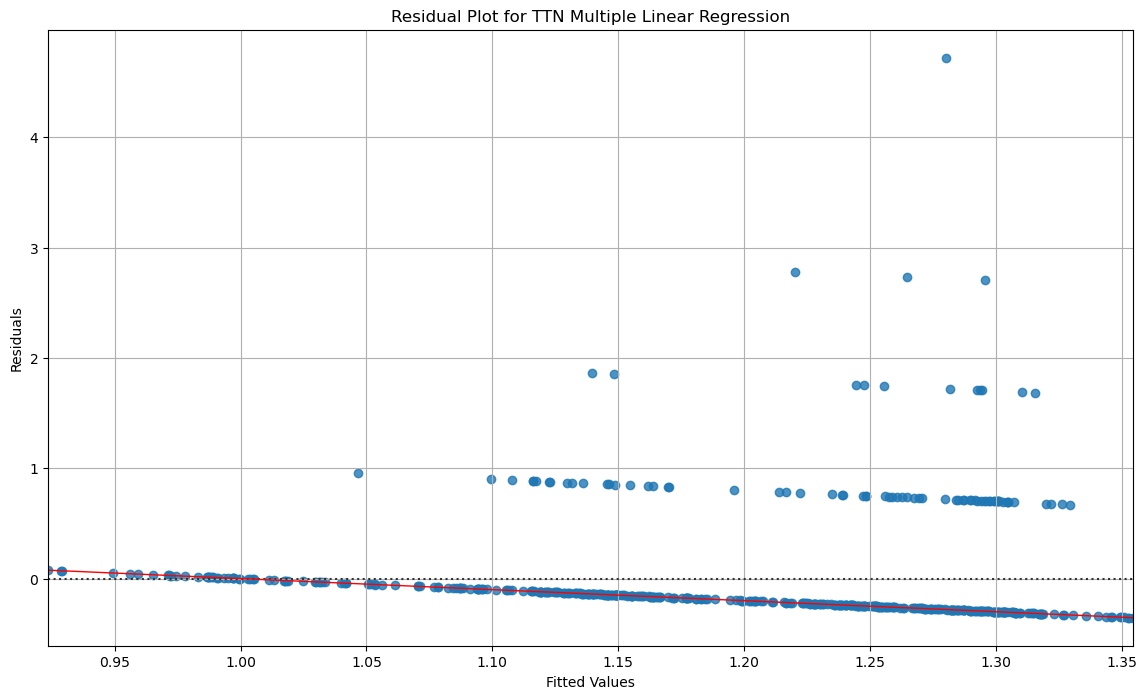

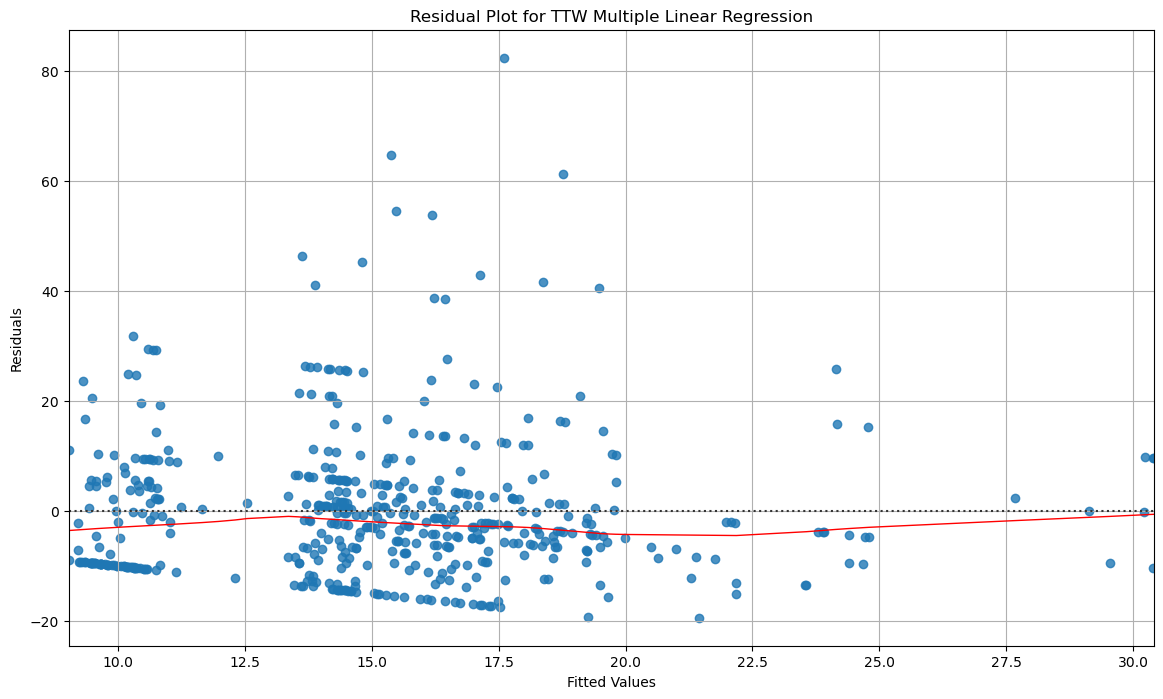

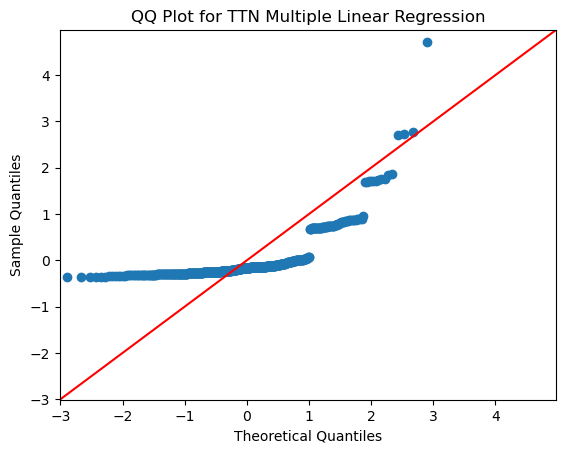

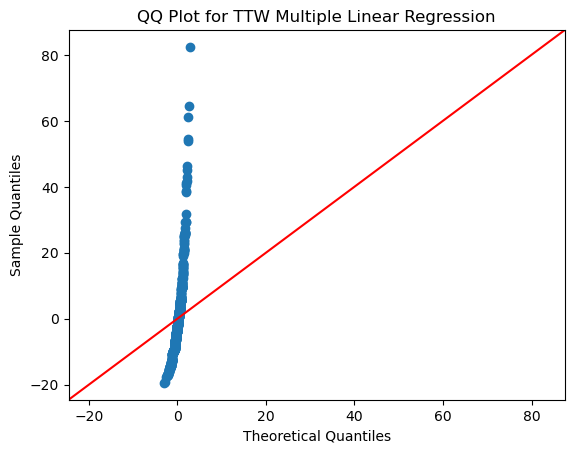

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Residual plots for TTN
plt.figure(figsize=(14, 8))
sns.residplot(x=model_ttn.fittedvalues, y=model_ttn.resid, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Residual Plot for TTN Multiple Linear Regression')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Residual plots for TTW
plt.figure(figsize=(14, 8))
sns.residplot(x=model_ttw.fittedvalues, y=model_ttw.resid, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Residual Plot for TTW Multiple Linear Regression')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# QQ plots for TTN
sm.qqplot(model_ttn.resid, line='45')
plt.title('QQ Plot for TTN Multiple Linear Regression')
plt.show()

# QQ plots for TTW
sm.qqplot(model_ttw.resid, line='45')
plt.title('QQ Plot for TTW Multiple Linear Regression')
plt.show()
